# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ridwan Setio Budi
- **Email:** ridwansetiobudi77@gmail.com
- **ID Dicoding:** ridwanstbd

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan tingkat konversi penjualan antara produk dengan jumlah foto lebih dari 3 dan produk dengan foto tunggal pada tahun 2018?
- Berapa persentase penurunan review score untuk pesanan yang pengirimannya melewati tanggal estimasi pengiriman, dan kategori produk apa yang paling terdampak selama periode 2017-2018?
- Seberapa besar perbedaan rata-rata nilai pesanan antara pelanggan di 5 negara bagian teratas dibandingkan dengan 5 negara bagian terbawah berdasarkan jumlah pelanggan, dan bagaimana tren ini berubah per kuartal sepanjang dataset?
- Berapa persentase peningkatan pendapatan dari penjual yang menawarkan cicilan pembayaran 6-12 kali dibandingkan dengan penjual yang hanya menawarkan pembayaran langsung dalam kategori produk yang sama selama 2018?
- Bagaimana performa penjualan dan margin keuntungan dari 10 kategori produk teratas di cluster penjual Ibitinga dibandingkan dengan penjual dari kota-kota lain yang menjual kategori produk yang sama selama 6 bulan terakhir dalam dataset?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
product_categories = pd.read_csv("./data/product_category_name_translation.csv")
product_categories.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
geolocations_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

**sellers_df**

In [13]:
sellers_df.describe()
# Melihat frekuensi kode pos untuk mendeteksi anomali
sellers_df['seller_zip_code_prefix'].value_counts().head(10)

seller_zip_code_prefix
14940    49
13660    10
16200     9
13920     9
14020     8
1026      8
87050     8
13481     7
37540     7
18015     6
Name: count, dtype: int64

In [14]:
# Periksa penjual dengan kode pos 14940
sellers_14940 = sellers_df[sellers_df['seller_zip_code_prefix'] == 14940]
print(f"Jumlah penjual unik dengan kode pos 14940: {sellers_14940['seller_id'].nunique()}")

# Periksa format kode pos
digits_count = sellers_df['seller_zip_code_prefix'].astype(str).str.len().value_counts()
print("\nDistribusi panjang digit kode pos:")
print(digits_count)

Jumlah penjual unik dengan kode pos 14940: 49

Distribusi panjang digit kode pos:
seller_zip_code_prefix
5    2068
4    1027
Name: count, dtype: int64


In [15]:
# Cek apakah kode pos 4 digit terdapat dalam dataset geolokasi
four_digit_zips = sellers_df[sellers_df['seller_zip_code_prefix'].astype(str).str.len() == 4]['seller_zip_code_prefix'].unique()
matching_geo = geolocations_df[geolocations_df['geolocation_zip_code_prefix'].isin(four_digit_zips)]
print(f"Jumlah kode pos 4 digit yang ditemukan dalam dataset geolokasi: {matching_geo['geolocation_zip_code_prefix'].nunique()}")

Jumlah kode pos 4 digit yang ditemukan dalam dataset geolokasi: 829


In [16]:
print("Detail lokasi untuk kode pos 14940:")
print(sellers_14940[['seller_city', 'seller_state']].drop_duplicates())

Detail lokasi untuk kode pos 14940:
   seller_city seller_state
64    ibitinga           SP


**Insight:**
- Semua 49 penjual dengan kode pos 14940 berlokasi di kota Ibitinga, negara bagian São Paulo (SP), Brasil.
- Fakta bahwa 49 penjual (sekitar 1,58% dari total 3095 penjual) terkonsentrasi di satu lokasi kecil adalah fenomena bisnis yang menarik, bukan anomali data.

**geolocations_df**

In [17]:
geolocations_df.info()
geolocations_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [18]:
# Periksa koordinat ekstrem
extreme_coords = geolocations_df[
    (geolocations_df['geolocation_lng'] < -75) | 
    (geolocations_df['geolocation_lng'] > -30) |
    (geolocations_df['geolocation_lat'] < -35) | 
    (geolocations_df['geolocation_lat'] > 5)
]
print(f"Jumlah koordinat di luar rentang Brasil: {extreme_coords.shape[0]}")
print("Sampel 5 koordinat ekstrem:")
print(extreme_coords.sample(5))

Jumlah koordinat di luar rentang Brasil: 29
Sampel 5 koordinat ekstrem:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
538512                        29654        29.409252       -98.484121   
538557                        29654        21.657547      -101.466766   
770534                        68447        42.428884        -6.873344   
698466                        47310        38.268205        -7.803886   
993075                        98780       -36.603837       -64.287433   

              geolocation_city geolocation_state  
538512  santo antônio do canaã                ES  
538557  santo antonio do canaa                ES  
770534        vila dos cabanos                PA  
698466      santana do sobrado                BA  
993075              santa rosa                RS  


**Insight:**
- Dari 1.000.163 baris data, terdapat 29 koordinat yang berada di luar rentang normal Brasil. Meskipun jumlahnya kecil (kurang dari 0,003% dari dataset), anomali ini perlu ditangani.
- Anomali yang terlihat pada sampel:

- Baris 727755: Koordinat (45.065933, 9.341528) untuk "Pau D'arco, AL" sebenarnya berada di Eropa Utara (sekitar Italia), bukan di Alagoas, Brasil.
- Baris 860562: Koordinat (42.184003, -8.723762) untuk "Ilha dos Valadares, PR" berada di sekitar Spanyol, bukan di Paraná, Brasil.
- Baris 516682: Koordinat (43.684961, -7.411080) untuk "Portela, RJ" juga berada di sekitar Spanyol, bukan di Rio de Janeiro.
- Baris 965687: Koordinat (14.585073, 121.105394) untuk "Santa Lucia do Piai, RS" berada di sekitar Filipina, sangat jauh dari Rio Grande do Sul.
- Baris 992584: Koordinat (-36.605374, -64.283946) untuk "Santa Rosa, RS" berada di Patagonia Argentina, bukan di Rio Grande do Sul, Brasil.
- Semua lokasi ini seharusnya berada di Brasil berdasarkan kode negara bagian (RS, AL, PR, RJ) yang merupakan kode resmi negara bagian Brasil, namun koordinatnya secara geografis berada di luar Brasil.
- pertimbangkan untuk menghapus 29 baris anomali ini karena jumlahnya sangat kecil dibandingkan total dataset.

**customers_df**

In [19]:
customers_df.info()
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
# Periksa distribusi panjang digit kode pos pelanggan
digit_counts = customers_df['customer_zip_code_prefix'].astype(str).str.len().value_counts()
print("Distribusi panjang digit kode pos pelanggan:")
print(digit_counts)

# Periksa perbandingan jumlah customer_id vs customer_unique_id
unique_customer_ids = customers_df['customer_id'].nunique()
unique_customer_unique_ids = customers_df['customer_unique_id'].nunique()
print(f"Jumlah customer_id unik: {unique_customer_ids}")
print(f"Jumlah customer_unique_id unik: {unique_customer_unique_ids}")
print(f"Rasio: {unique_customer_ids / unique_customer_unique_ids:.2f}")

# Periksa distribusi pelanggan per negara bagian
state_counts = customers_df['customer_state'].value_counts()
print("\nTop 10 negara bagian berdasarkan jumlah pelanggan:")
print(state_counts.head(10))

# Periksa apakah ada kode pos dengan konsentrasi pelanggan yang sangat tinggi
zipcode_counts = customers_df['customer_zip_code_prefix'].value_counts()
print("\nTop 10 kode pos berdasarkan jumlah pelanggan:")
print(zipcode_counts.head(10))

Distribusi panjang digit kode pos pelanggan:
customer_zip_code_prefix
5    75446
4    23995
Name: count, dtype: int64
Jumlah customer_id unik: 99441
Jumlah customer_unique_id unik: 96096
Rasio: 1.03

Top 10 negara bagian berdasarkan jumlah pelanggan:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

Top 10 kode pos berdasarkan jumlah pelanggan:
customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: count, dtype: int64


In [21]:
# Periksa customer_unique_id yang memiliki lebih dari satu customer_id
duplicate_customers = customers_df.groupby('customer_unique_id')['customer_id'].count().reset_index()
customers_with_multiple_ids = duplicate_customers[duplicate_customers['customer_id'] > 1]
print(f"Jumlah pelanggan dengan multiple customer_id: {len(customers_with_multiple_ids)}")
print(f"Maksimum customer_id yang dimiliki satu pelanggan: {customers_with_multiple_ids['customer_id'].max()}")

# Sampel beberapa pelanggan dengan multiple IDs
print("\nSampel pelanggan dengan multiple customer_id:")
sample_multiple_ids = customers_with_multiple_ids.sample(5)['customer_unique_id'].tolist()
for cust_id in sample_multiple_ids:
    print(f"\nDetail untuk customer_unique_id: {cust_id}")
    print(customers_df[customers_df['customer_unique_id'] == cust_id][['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']])

# Periksa konsistensi data geografis untuk customer_unique_id yang sama
customers_geo_consistency = customers_df.groupby('customer_unique_id').agg({
    'customer_zip_code_prefix': 'nunique',
    'customer_city': 'nunique',
    'customer_state': 'nunique'
}).reset_index()

inconsistent_geo = customers_geo_consistency[
    (customers_geo_consistency['customer_zip_code_prefix'] > 1) | 
    (customers_geo_consistency['customer_city'] > 1) | 
    (customers_geo_consistency['customer_state'] > 1)
]

print(f"\nJumlah pelanggan dengan data geografis tidak konsisten: {len(inconsistent_geo)}")
print(f"Persentase: {len(inconsistent_geo) / len(customers_geo_consistency) * 100:.2f}%")

Jumlah pelanggan dengan multiple customer_id: 2997
Maksimum customer_id yang dimiliki satu pelanggan: 17

Sampel pelanggan dengan multiple customer_id:

Detail untuk customer_unique_id: 5461338ea772177374bcf3f23665178f
                            customer_id  customer_zip_code_prefix  \
11389  666757864a60a4cb22fc360c7078612e                      7132   
75077  8029c993d1227eb7f924230c8676ee07                      7132   

      customer_city customer_state  
11389     guarulhos             SP  
75077     guarulhos             SP  

Detail untuk customer_unique_id: 582183483d33018384b309d31c45f353
                            customer_id  customer_zip_code_prefix  \
62694  81da32b129ca6a2de6af52b124932546                     19360   
85515  01fa97994accc8a76cd66d477a124ec7                     19360   

         customer_city customer_state  
62694  santo anastacio             SP  
85515  santo anastacio             SP  

Detail untuk customer_unique_id: a10fe3c477989c968aa284bd448b1d5b


**Insight:**
- Data Relatif Bersih: Persentase pelanggan dengan data geografis tidak konsisten sangat kecil (0,26%)
- Multiple IDs dengan Alamat Sama: Ini menunjukkan bahwa pelanggan mungkin membuat akun baru untuk alasan lain (misalnya lupa password, ingin mendapatkan promo untuk pengguna baru, dll.)

**product_categories**

In [22]:
product_categories.info()
product_categories.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Adanya 71 kategori produk berbeda menunjukkan platform e-commerce ini memiliki diversifikasi produk yang luas, mencakup berbagai segmen pasar.
- Dapat digunakan untuk segmentasi produk dan analisis performa lintas kategori.

**product_df**

In [23]:
products_df.info()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Missing Values:product_category_name: 610 nilai kosong (32951 - 32341 = 610)
product_name_lenght, product_description_lenght, dan product_photos_qty: 610 nilai kosong
product_weight_g, product_length_cm, product_height_cm, dan product_width_cm: 2 nilai kosong (32951 - 32949 = 2)
- Kolom product_name_lenght dan product_description_lenght memiliki kesalahan ejaan ("lenght" bukan "length")
- Deskripsi produk dengan hanya 4 karakter sangat pendek dan tidak memadai untuk menggambarkan produk dengan baik
- Banyak produk hanya memiliki 1 foto, yang kurang optimal untuk e-commerce
- Nilai minimum 0g tidak masuk akal untuk produk fisik
- Nilai maksimum 40425g (40.4kg) sangat berat, produk khusus atau kesalahan input
- Beberapa produk memiliki dimensi sangat besar (maksimum 105cm untuk tinggi dan panjang, 118cm untuk lebar)
- Semua atribut dimensi dan kuantitas menggunakan tipe data float64, yang mungkin tidak efisien untuk data yang seharusnya berupa integer (seperti jumlah foto)


**orders_df**

In [24]:
orders_df.info()
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Semua kolom timestamp disimpan sebagai object (string), bukan tipe data datetime yang seharusnya
- Missing Values:
order_approved_at: 160 nilai hilang (99.441 - 99.281 = 160)
order_delivered_carrier_date: 1.783 nilai hilang (99.441 - 97.658 = 1.783)
order_delivered_customer_date: 2.965 nilai hilang (99.441 - 96.476 = 2.965)
- Pola nilai hilang ini wajar dalam konteks pesanan, karena beberapa pesanan mungkin dibatalkan sebelum disetujui, atau masih dalam proses pengiriman

**order_items_df**

In [25]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
# Periksa statistik deskriptif
print(order_items_df.describe())

# Periksa distribusi jumlah item per pesanan
items_per_order = order_items_df.groupby('order_id')['order_item_id'].max().value_counts().sort_index()
print("\nDistribusi jumlah item per pesanan:")
print(items_per_order)

# Periksa rentang harga dan biaya pengiriman
print("\nStatistik harga:")
print(order_items_df['price'].describe())
print("\nStatistik biaya pengiriman:")
print(order_items_df['freight_value'].describe())

# Periksa order_item_id - apakah dimulai dari 1 untuk setiap pesanan?
item_id_check = order_items_df.groupby('order_id')['order_item_id'].agg(['min', 'max'])
print("\nCheck order_item_id:")
print("Minimum order_item_id selalu 1?", (item_id_check['min'] == 1).all())
print("order_item_id berurutan?", ((item_id_check['max'] - item_id_check['min'] + 1) == 
                                  order_items_df.groupby('order_id').size()).all())

# Periksa shipping_limit_date
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
print("\nRentang shipping_limit_date:")
print("Min:", order_items_df['shipping_limit_date'].min())
print("Max:", order_items_df['shipping_limit_date'].max())

       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

Distribusi jumlah item per pesanan:
order_item_id
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
9         3
10        8
11        4
12        5
13        1
14        2
15        2
20        2
21        1
Name: count, dtype: int64

Statistik harga:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Statistik biaya pengiriman:
c

**Insight:**
- Tipe Data:
order_item_id bertipe int64, yang sesuai untuk pengidentifikasi numerik
price dan freight_value bertipe float64, yang tepat untuk nilai moneter
Kolom lainnya bertipe object (string), termasuk shipping_limit_date yang seharusnya tanggal
- Jumlah Pesanan vs Item Pesanan:
Dataset orders_df memiliki 99.441 pesanan unik
Dataset order_items_df memiliki 112.650 baris
Ini menunjukkan bahwa beberapa pesanan berisi lebih dari satu item (rata-rata 1,13 item per pesanan)
- Anomali Serius: Harga maksimum sangat tinggi (R$6.735), yang jauh di atas harga rata-rata (R$120,65)
- Anomali: Terdapat biaya pengiriman 0 (R$0), yang tidak masuk akal untuk pengiriman produk fisik


**order_payments_df**

In [27]:
order_payments_df.info()
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [28]:
# Periksa pembayaran bernilai nol
zero_payments = order_payments_df[order_payments_df['payment_value'] == 0]
print(f"Jumlah pembayaran bernilai nol: {len(zero_payments)}")

Jumlah pembayaran bernilai nol: 9


In [29]:
# Analisis pembayaran dengan nilai sangat tinggi
high_value = order_payments_df[order_payments_df['payment_value'] > 1000]
print(f"Jumlah pembayaran >R$1000: {len(high_value)}")
print(high_value.sort_values('payment_value', ascending=False).head())

Jumlah pembayaran >R$1000: 1150
                               order_id  payment_sequential payment_type  \
52107  03caa2c082116e1d31e67e9ae3700499                   1  credit_card   
34370  736e1922ae60d0d6a89247b851902527                   1       boleto   
41419  0812eb902a67711a1cb742b3cdaa65ae                   1  credit_card   
49581  fefacc66af859508bf1a7934eab1e97f                   1       boleto   
85539  f5136e38d1a14a4dbd87dff67da82701                   1       boleto   

       payment_installments  payment_value  
52107                     1       13664.08  
34370                     1        7274.88  
41419                     8        6929.31  
49581                     1        6922.21  
85539                     1        6726.66  


In [30]:
# Periksa pesanan dengan banyak transaksi pembayaran
payment_counts = order_payments_df.groupby('order_id')['payment_sequential'].max()
multiple_payments = payment_counts[payment_counts > 1]
print(f"Jumlah pesanan dengan multiple pembayaran: {len(multiple_payments)}")
print(f"Distribusi jumlah pembayaran per pesanan:")
print(multiple_payments.value_counts().sort_index())

Jumlah pesanan dengan multiple pembayaran: 3039
Distribusi jumlah pembayaran per pesanan:
payment_sequential
2     2458
3      303
4      108
5       52
6       36
7       28
8       11
9        9
10       5
11       8
12       8
13       3
14       2
15       2
19       2
21       1
22       1
26       1
29       1
Name: count, dtype: int64


In [31]:
# Bandingkan nilai pembayaran total dengan nilai item dalam pesanan
order_totals = order_payments_df.groupby('order_id')['payment_value'].sum()
print(order_totals)

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
                                     ...  
fffc94f6ce00a00581880bf54a75a037    343.40
fffcd46ef2263f404302a634eb57f7eb    386.53
fffce4705a9662cd70adb13d4a31832d    116.85
fffe18544ffabc95dfada21779c9644f     64.71
fffe41c64501cc87c801fd61db3f6244     55.79
Name: payment_value, Length: 99440, dtype: float64


**Insight**
- Terdapat 103.886 baris data pembayaran dengan 5 kolom.
- Semua kolom memiliki tipe data yang sesuai: order_id dan payment_type bertipe object, payment_sequential dan payment_installments bertipe int64, dan payment_value bertipe float64.
- Tidak ada missing values dalam dataset ini.
- Pembayaran dengan kartu kredit mendominasi metode pembayaran, diikuti oleh boleto.
- Jumlah cicilan bervariasi dari 1 hingga 24, dengan rata-rata sekitar 2 cicilan per pembayaran.
- Nilai pembayaran bervariasi dari yang sangat kecil hingga lebih dari R$10.000, dengan rata-rata sekitar R$154,10.
- Anomali Nilai Pembayaran:Pembayaran dengan nilai R$0 tidak masuk akal dan perlu diinvestigasi
Nilai maksimum R$13.664,08 sangat tinggi dan perlu dicek apakah valid
- Anomali Cicilan: Adanya cicilan 0 tidak masuk akal dan perlu dikoreksi
- Anomali Urutan Pembayaran:Maksimum 29 urutan pembayaran untuk satu pesanan sangat tidak biasa dan memerlukan investigasi lebih lanjut

**order_reviews_df**

In [32]:
order_reviews_df.info()
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight**
- Ukuran Dataset: Dataset berisi 99.224 ulasan, yang hampir sama dengan jumlah pesanan (99.441)
Ini menunjukkan tingkat pemberian ulasan yang sangat tinggi (~99.8%)
- Missing Values:
Kolom utama (review_id, order_id, review_score, review_creation_date, review_answer_timestamp) tidak memiliki nilai kosong
review_comment_title: 87.656 nilai kosong (hanya 11.568 terisi)
review_comment_message: 58.247 nilai kosong (hanya 40.977 terisi)
Banyaknya nilai kosong pada kolom komentar menunjukkan bahwa banyak pelanggan memberikan rating tanpa menulis komentar
- Tipe Data: review_score menggunakan tipe data int64, sesuai untuk skor numerik
Kolom tanggal (review_creation_date, review_answer_timestamp) disimpan sebagai object bukan datetime
Kolom lainnya menggunakan tipe object sesuai untuk ID dan teks
- Distribusi Skor: Rata-rata skor ulasan adalah 4.09 dari 5, menunjukkan sentimen yang sangat positif
Nilai median dan 75% adalah 5, yang berarti mayoritas ulasan memberikan skor tertinggi
Skor minimum adalah 1, menunjukkan ada juga pelanggan yang sangat tidak puas
- Sentimen Pelanggan:Distribusi skor yang miring ke kanan (nilai median = 5) menunjukkan sebagian besar pelanggan sangat puas
Standar deviasi 1.35 menunjukkan variasi yang signifikan dalam skor ulasan

### Cleaning Data

**sellers_df**

In [33]:
# Normalisasi kode pos menjadi format 5 digit dengan padding 0
sellers_df['seller_zip_code_prefix_normalized'] = sellers_df['seller_zip_code_prefix'].astype(str).str.zfill(5)

In [34]:
# Cek apakah kode pos 4 digit terdapat dalam dataset geolokasi
four_digit_zips = sellers_df[sellers_df['seller_zip_code_prefix'].astype(str).str.len() == 4]['seller_zip_code_prefix'].unique()
matching_geo = geolocations_df[geolocations_df['geolocation_zip_code_prefix'].isin(four_digit_zips)]
print(f"Jumlah kode pos 4 digit yang ditemukan dalam dataset geolokasi: {matching_geo['geolocation_zip_code_prefix'].nunique()}")

Jumlah kode pos 4 digit yang ditemukan dalam dataset geolokasi: 829


**geolocations_df**

In [35]:
# Identifikasi semua koordinat geolocation yang tidak valid
invalid_coords = geolocations_df[
    (geolocations_df['geolocation_lng'] < -75) | 
    (geolocations_df['geolocation_lng'] > -30) |
    (geolocations_df['geolocation_lat'] < -35) | 
    (geolocations_df['geolocation_lat'] > 5)
]

# Simpan daftar koordinat tidak valid untuk referensi
invalid_coords.to_csv('data/invalid_coordinates.csv', index=False)

# Buat versi dataset yang sudah dibersihkan
geolocations_clean_df = geolocations_df[~geolocations_df.index.isin(invalid_coords.index)]

# Verifikasi ukuran dataset baru
print(f"Ukuran dataset original: {geolocations_df.shape[0]} baris")
print(f"Ukuran dataset dibersihkan: {geolocations_clean_df.shape[0]} baris")
print(f"Jumlah baris yang dihapus: {geolocations_df.shape[0] - geolocations_clean_df.shape[0]} baris")

Ukuran dataset original: 1000163 baris
Ukuran dataset dibersihkan: 1000134 baris
Jumlah baris yang dihapus: 29 baris


**customers_df**

In [36]:
# Standarisasi semua kode pos menjadi format 5 digit
customers_df['customer_zip_code_prefix_norm'] = customers_df['customer_zip_code_prefix'].astype(str).str.zfill(5)

In [37]:
# Buat flag untuk pelanggan dengan multiple IDs
customer_id_counts = customers_df.groupby('customer_unique_id')['customer_id'].count().reset_index()
customer_id_counts.rename(columns={'customer_id': 'id_count'}, inplace=True)
customers_df = customers_df.merge(customer_id_counts, on='customer_unique_id', how='left')
customers_df['has_multiple_ids'] = customers_df['id_count'] > 1

**products_df**


In [38]:
#penanganan missing values
# Cek proporsi missing values untuk setiap kolom
missing_values = products_df.isnull().sum()
missing_percentage = (missing_values / len(products_df)) * 100
print(missing_percentage)

# Analisis pola missing values
print("Jumlah produk tanpa kategori:", products_df['product_category_name'].isnull().sum())

# Periksa apakah missing values pada beberapa kolom saling terkait
missing_pattern = products_df[products_df['product_category_name'].isnull()]
print("Jumlah nilai kosong pada atribut lain untuk produk tanpa kategori:")
print(missing_pattern.isnull().sum())

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64
Jumlah produk tanpa kategori: 610
Jumlah nilai kosong pada atribut lain untuk produk tanpa kategori:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                1
product_length_cm               1
product_height_cm               1
product_width_cm                1
dtype: int64


In [39]:
# Perbaiki nama kolom dengan ejaan yang salah
products_df = products_df.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})

In [40]:
# penanganan outlier berat
# Identifikasi produk dengan berat 0g
zero_weight = products_df[products_df['product_weight_g'] == 0]
print(f"Jumlah produk dengan berat 0g: {len(zero_weight)}")

# Identifikasi produk dengan berat sangat besar
heavy_products = products_df[products_df['product_weight_g'] > 10000]
print(f"Jumlah produk dengan berat >10kg: {len(heavy_products)}")
print(heavy_products[['product_id', 'product_category_name', 'product_weight_g']].head())

Jumlah produk dengan berat 0g: 4
Jumlah produk dengan berat >10kg: 1891
                          product_id      product_category_name  \
6   732bd381ad09e530fe0a5f457d81becb                 cool_stuff   
44  7a8dac4aaa16bc642e4df33adcf03303                 cool_stuff   
46  5f504b3a1c75b73d6151be81eb05bdc9                 cool_stuff   
68  1e5428c428e0f783acd6e3d94ba4ee2a                        pcs   
79  07f01b6fcacc1b187a71e5074199db2d  agro_industria_e_comercio   

    product_weight_g  
6            18350.0  
44           11750.0  
46           15350.0  
68           12000.0  
79           16400.0  


In [41]:
# Identifikasi produk dengan deskripsi sangat pendek
short_desc = products_df[products_df['product_description_length'] < 20]
print(f"Jumlah produk dengan deskripsi <20 karakter: {len(short_desc)}")

Jumlah produk dengan deskripsi <20 karakter: 7


In [42]:
# Hitung volume produk sebagai metrik tambahan
products_df['product_volume_cm3'] = products_df['product_length_cm'] * products_df['product_height_cm'] * products_df['product_width_cm']

# Identifikasi produk dengan volume ekstrem
large_volume = products_df[products_df['product_volume_cm3'] > 100000]
print(f"Jumlah produk dengan volume >100.000 cm³: {len(large_volume)}")

Jumlah produk dengan volume >100.000 cm³: 715


In [43]:
# Analisis statistik berdasarkan kategori
category_stats = products_df.groupby('product_category_name').agg({
    'product_weight_g': ['mean', 'median', 'std', 'min', 'max'],
    'product_volume_cm3': ['mean', 'median', 'std'],
    'product_photos_qty': ['mean', 'median']
})

# Identifikasi kategori dengan karakteristik ekstrem
print(category_stats.sort_values(('product_weight_g', 'mean'), ascending=False).head())

                                               product_weight_g           \
                                                           mean   median   
product_category_name                                                      
moveis_colchao_e_estofado                          13190.000000   8675.0   
moveis_escritorio                                  12740.867314  11600.0   
moveis_cozinha_area_de_servico_jantar_e_jardim     11598.563830   9950.0   
moveis_quarto                                       9997.222222  10600.0   
eletrodomesticos_2                                  9913.333333   9050.0   

                                                                               \
                                                         std     min      max   
product_category_name                                                           
moveis_colchao_e_estofado                       12336.391513  1700.0  30000.0   
moveis_escritorio                                6106.700414    50.

**orders_df**

In [44]:
# Konversi kolom timestamp ke tipe data datetime
datetime_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

In [45]:
# analisis status pesanan
# Periksa distribusi status pesanan
status_counts = orders_df['order_status'].value_counts()
print("Distribusi status pesanan:")
print(status_counts)
print(f"Persentase: {status_counts / len(orders_df) * 100}")

Distribusi status pesanan:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
Persentase: order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: count, dtype: float64


In [46]:
# analisis missing values
 # Periksa hubungan antara status pesanan dan missing values
missing_by_status = orders_df.groupby('order_status').apply(
    lambda x: x[datetime_columns].isnull().mean() * 100
)
print("Persentase missing values berdasarkan status pesanan:")
print(missing_by_status)

Persentase missing values berdasarkan status pesanan:
              order_purchase_timestamp  order_approved_at  \
order_status                                                
approved                           0.0           0.000000   
canceled                           0.0          22.560000   
created                            0.0         100.000000   
delivered                          0.0           0.014511   
invoiced                           0.0           0.000000   
processing                         0.0           0.000000   
shipped                            0.0           0.000000   
unavailable                        0.0           0.000000   

              order_delivered_carrier_date  order_delivered_customer_date  \
order_status                                                                
approved                        100.000000                     100.000000   
canceled                         88.000000                      99.040000   
created                    

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\796341264.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_status = orders_df.groupby('order_status').apply(


**order_items_df**

In [47]:
# Langkah 1: Konversi tipe data
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
# Langkah 2: Penanganan harga yang tidak wajar
# Buat salinan dataframe untuk mempertahankan data asli
order_items_clean_df = order_items_df.copy()

# Identifikasi harga yang terlalu rendah (misalnya < R$1)
low_price_mask = order_items_clean_df['price'] < 1
print(f"Jumlah item dengan harga terlalu rendah (<R$1): {low_price_mask.sum()}")
# Flag item dengan harga tidak wajar untuk analisis lebih lanjut
order_items_clean_df['price_flag'] = 'normal'
order_items_clean_df.loc[order_items_clean_df['price'] < 1, 'price_flag'] = 'too_low'
order_items_clean_df.loc[order_items_clean_df['price'] > 2000, 'price_flag'] = 'too_high'

# Langkah 3: Penanganan biaya pengiriman tidak wajar
# Identifikasi pengiriman gratis
free_shipping_mask = order_items_clean_df['freight_value'] == 0
print(f"Jumlah item dengan pengiriman gratis: {free_shipping_mask.sum()}")

# Identifikasi biaya pengiriman sangat tinggi (misalnya > R$100)
high_freight_mask = order_items_clean_df['freight_value'] > 100
print(f"Jumlah item dengan biaya pengiriman tinggi (>R$100): {high_freight_mask.sum()}")

# Flag item dengan biaya pengiriman tidak wajar
order_items_clean_df['freight_flag'] = 'normal'
order_items_clean_df.loc[free_shipping_mask, 'freight_flag'] = 'free_shipping'
order_items_clean_df.loc[high_freight_mask, 'freight_flag'] = 'high_freight'

# Langkah 4: Validasi harga vs biaya pengiriman
# Flag item dengan biaya pengiriman lebih tinggi dari harga produk
freight_higher_than_price = order_items_clean_df['freight_value'] > order_items_clean_df['price']
order_items_clean_df.loc[freight_higher_than_price, 'price_freight_flag'] = 'freight_higher'
print(f"Jumlah item dengan biaya pengiriman > harga: {freight_higher_than_price.sum()}")

# Langkah 5: Validasi pesanan dengan banyak item
# Hitung jumlah item per pesanan
items_per_order = order_items_clean_df.groupby('order_id').size().reset_index(name='item_count')
large_orders = items_per_order[items_per_order['item_count'] > 10]
print(f"Jumlah pesanan dengan >10 item: {len(large_orders)}")

# Tambahkan flag untuk pesanan dengan banyak item
order_items_clean_df = order_items_clean_df.merge(
    large_orders[['order_id']], 
    on='order_id', 
    how='left', 
    indicator=True
)
order_items_clean_df['large_order_flag'] = np.where(order_items_clean_df['_merge'] == 'both', True, False)
order_items_clean_df.drop('_merge', axis=1, inplace=True)

# Langkah 6: Verifikasi konsistensi dengan tabel lain
# Verifikasi semua order_id ada di tabel orders
valid_order_ids = set(orders_df['order_id'])
invalid_orders = ~order_items_clean_df['order_id'].isin(valid_order_ids)
print(f"Jumlah item dengan order_id tidak valid: {invalid_orders.sum()}")

# Verifikasi semua product_id ada di tabel products
valid_product_ids = set(products_df['product_id'])
invalid_products = ~order_items_clean_df['product_id'].isin(valid_product_ids)
print(f"Jumlah item dengan product_id tidak valid: {invalid_products.sum()}")

# Verifikasi semua seller_id ada di tabel sellers
valid_seller_ids = set(sellers_df['seller_id'])
invalid_sellers = ~order_items_clean_df['seller_id'].isin(valid_seller_ids)
print(f"Jumlah item dengan seller_id tidak valid: {invalid_sellers.sum()}")

# Tambahkan flag untuk ID yang tidak valid
order_items_clean_df['invalid_order_id'] = invalid_orders
order_items_clean_df['invalid_product_id'] = invalid_products
order_items_clean_df['invalid_seller_id'] = invalid_sellers


Jumlah item dengan harga terlalu rendah (<R$1): 3
Jumlah item dengan pengiriman gratis: 383
Jumlah item dengan biaya pengiriman tinggi (>R$100): 671
Jumlah item dengan biaya pengiriman > harga: 4124
Jumlah pesanan dengan >10 item: 17
Jumlah item dengan order_id tidak valid: 0
Jumlah item dengan product_id tidak valid: 0
Jumlah item dengan seller_id tidak valid: 0


**order_payments_df**

In [48]:
# Buat salinan dataframe untuk proses cleaning
order_payments_clean_df = order_payments_df.copy()

# 1. Penanganan pembayaran bernilai nol
zero_payments_mask = order_payments_clean_df['payment_value'] == 0
print(f"Jumlah pembayaran bernilai nol: {zero_payments_mask.sum()}")


# Tandai pembayaran bernilai nol
order_payments_clean_df['zero_payment_flag'] = zero_payments_mask

# 2. Penanganan cicilan nol
zero_installments_mask = order_payments_clean_df['payment_installments'] == 0
print(f"Jumlah pembayaran dengan cicilan nol: {zero_installments_mask.sum()}")

# Perbaiki cicilan nol (set ke 1 karena minimal harus 1 cicilan)
order_payments_clean_df.loc[zero_installments_mask, 'payment_installments'] = 1
print("Cicilan nol telah diperbaiki menjadi 1")

# 3. Penanganan pembayaran nilai ekstrem
# Tandai pembayaran dengan nilai sangat tinggi (>R$1000)
high_value_mask = order_payments_clean_df['payment_value'] > 1000
order_payments_clean_df['high_value_flag'] = high_value_mask
print(f"Jumlah pembayaran bernilai tinggi (>R$1000): {high_value_mask.sum()}")

# 4. Penanganan urutan pembayaran yang tidak biasa
# Hitung jumlah pembayaran per pesanan
payment_counts = order_payments_clean_df.groupby('order_id')['payment_sequential'].max().reset_index()
payment_counts.rename(columns={'payment_sequential': 'payment_count'}, inplace=True)

# Gabungkan informasi jumlah pembayaran ke dataframe utama
order_payments_clean_df = order_payments_clean_df.merge(payment_counts, on='order_id', how='left')

# Tandai pesanan dengan jumlah pembayaran yang tidak biasa (>5)
order_payments_clean_df['multiple_payment_flag'] = order_payments_clean_df['payment_count'] > 5
print(f"Jumlah pesanan dengan >5 pembayaran: {order_payments_clean_df['multiple_payment_flag'].sum() // order_payments_clean_df['payment_count'].mean():.0f}")

# 5. Validasi konsistensi data dengan order_items (jika tersedia)
# Hitung total pembayaran per pesanan
order_payment_totals = order_payments_clean_df.groupby('order_id')['payment_value'].sum().reset_index()
order_payment_totals.rename(columns={'payment_value': 'total_payment'}, inplace=True)

# Jika order_items_df tersedia, bandingkan dengan total pesanan
if 'order_items_df' in globals():
    # Hitung total nilai pesanan (harga + ongkos kirim)
    order_item_totals = order_items_df.groupby('order_id').apply(
        lambda x: (x['price'] + x['freight_value']).sum()
    ).reset_index(name='total_order_value')
    
    # Gabungkan total pembayaran dan total pesanan
    order_value_comparison = order_payment_totals.merge(
        order_item_totals, 
        on='order_id', 
        how='inner'
    )
    
    # Hitung selisih antara pembayaran dan nilai pesanan
    order_value_comparison['payment_diff'] = order_value_comparison['total_payment'] - order_value_comparison['total_order_value']
    
    # Toleransi untuk perbedaan pembulatan
    tolerance = 1.0
    
    # Tandai pesanan dengan selisih pembayaran yang signifikan
    significant_diff = (abs(order_value_comparison['payment_diff']) > tolerance)
    print(f"Jumlah pesanan dengan selisih pembayaran signifikan: {significant_diff.sum()}")
    
    # Gabungkan flag selisih pembayaran ke dataframe utama
    order_value_comparison['payment_mismatch_flag'] = significant_diff
    order_payments_clean_df = order_payments_clean_df.merge(
        order_value_comparison[['order_id', 'payment_mismatch_flag']], 
        on='order_id', 
        how='left'
    )

# 6. Tambahkan flag ringkasan untuk semua anomali
order_payments_clean_df['has_anomaly'] = (
    order_payments_clean_df['zero_payment_flag'] | 
    order_payments_clean_df['high_value_flag'] | 
    order_payments_clean_df['multiple_payment_flag'] 
)
if 'payment_mismatch_flag' in order_payments_clean_df.columns:
    order_payments_clean_df['has_anomaly'] = order_payments_clean_df['has_anomaly'] | order_payments_clean_df['payment_mismatch_flag']

# 7. Menghasilkan dataset bersih (tanpa anomali)
clean_payments_df = order_payments_clean_df[~order_payments_clean_df['has_anomaly']]
print(f"\nJumlah baris original: {len(order_payments_df)}")
print(f"Jumlah baris setelah cleaning: {len(clean_payments_df)}")
print(f"Persentase data yang dipertahankan: {len(clean_payments_df)/len(order_payments_df)*100:.2f}%")


Jumlah pembayaran bernilai nol: 9
Jumlah pembayaran dengan cicilan nol: 2
Cicilan nol telah diperbaiki menjadi 1
Jumlah pembayaran bernilai tinggi (>R$1000): 1150
Jumlah pesanan dengan >5 pembayaran: 884


Jumlah pesanan dengan selisih pembayaran signifikan: 249

Jumlah baris original: 103886
Jumlah baris setelah cleaning: 101422
Persentase data yang dipertahankan: 97.63%


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\1235879640.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  order_item_totals = order_items_df.groupby('order_id').apply(


**order_reviews_df**

In [49]:
# Konversi kolom tanggal ke datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# Tambahkan flag untuk ulasan dengan komentar
order_reviews_df['has_comment_title'] = order_reviews_df['review_comment_title'].notna()
order_reviews_df['has_comment_message'] = order_reviews_df['review_comment_message'].notna()

# Opsi: Isi nilai kosong dengan string kosong (jika diperlukan)
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('')

# Distribusi skor ulasan
score_distribution = order_reviews_df['review_score'].value_counts().sort_index()
print("Distribusi skor ulasan:")
print(score_distribution)
print(f"Persentase: {score_distribution / len(order_reviews_df) * 100}")

# Analisis skor berdasarkan keberadaan komentar
reviews_with_comments = order_reviews_df[order_reviews_df['review_comment_message'].notna()]
reviews_without_comments = order_reviews_df[order_reviews_df['review_comment_message'].isna()]

print("\nSkor rata-rata dengan komentar:", reviews_with_comments['review_score'].mean())
print("Skor rata-rata tanpa komentar:", reviews_without_comments['review_score'].mean())

# Hitung waktu respons (selisih antara pembuatan ulasan dan jawaban)
order_reviews_df['response_time_hours'] = (
    order_reviews_df['review_answer_timestamp'] - 
    order_reviews_df['review_creation_date']
).dt.total_seconds() / 3600

print("\nStatistik waktu respons (jam):")
print(order_reviews_df['response_time_hours'].describe())

# Periksa apakah semua order_id dalam ulasan ada di tabel orders
valid_order_ids = set(orders_df['order_id'])
invalid_review_orders = ~order_reviews_df['order_id'].isin(valid_order_ids)
print(f"\nJumlah ulasan dengan order_id tidak valid: {invalid_review_orders.sum()}")

Distribusi skor ulasan:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64
Persentase: review_score
1    11.513344
2     3.175643
3     8.242965
4    19.291704
5    57.776344
Name: count, dtype: float64

Skor rata-rata dengan komentar: 4.08642062404257
Skor rata-rata tanpa komentar: nan

Statistik waktu respons (jam):
count    99224.000000
mean        75.575842
std        237.361183
min          2.141389
25%         24.116875
50%         40.198750
75%         74.485556
max      12448.781111
Name: response_time_hours, dtype: float64

Jumlah ulasan dengan order_id tidak valid: 0


## Exploratory Data Analysis (EDA)

### Explore Order_df

In [50]:
from datetime import datetime

# 1. Konversi tipe data datetime pada orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 2. Filter pesanan pada tahun 2018
orders_2018 = orders_df[orders_df['order_purchase_timestamp'].dt.year == 2018]

# 3. Gabungkan dataset untuk analisis
# Menghubungkan orders dengan order_items
orders_items_2018 = orders_2018.merge(
    order_items_df,
    on='order_id',
    how='inner'
)

# Menghubungkan dengan data produk
orders_items_products_2018 = orders_items_2018.merge(
    products_df,
    on='product_id',
    how='inner'
)

# 4. Kategorikan produk berdasarkan jumlah foto
# Produk dengan foto tunggal
single_photo_products = orders_items_products_2018[orders_items_products_2018['product_photos_qty'] == 1]

# Produk dengan lebih dari 3 foto
multi_photo_products = orders_items_products_2018[orders_items_products_2018['product_photos_qty'] > 3]

# 5. Hitung tingkat konversi (diasumsikan konversi = pesanan sukses / total view)
# Karena tidak ada data view, kita bisa menggunakan proksi seperti:
# - Rasio pesanan yang selesai (status = 'delivered') dibanding total pesanan
# - Rasio produk yang dibeli dibandingkan dengan total produk yang tersedia dengan jumlah foto tersebut

# Untuk pesanan dengan status 'delivered'
single_photo_delivered = single_photo_products[
    single_photo_products['order_id'].isin(
        orders_2018[orders_2018['order_status'] == 'delivered']['order_id']
    )
]

multi_photo_delivered = multi_photo_products[
    multi_photo_products['order_id'].isin(
        orders_2018[orders_2018['order_status'] == 'delivered']['order_id']
    )
]

# Hitung tingkat konversi
single_photo_conversion = len(single_photo_delivered) / len(single_photo_products) * 100
multi_photo_conversion = len(multi_photo_delivered) / len(multi_photo_products) * 100

# 6. Hitung metrik tambahan untuk memperkaya analisis
# Rata-rata nilai pesanan
single_photo_avg_order = single_photo_products['price'].mean()
multi_photo_avg_order = multi_photo_products['price'].mean()

# Jumlah unik produk yang terjual
single_photo_unique_products = single_photo_products['product_id'].nunique()
multi_photo_unique_products = multi_photo_products['product_id'].nunique()

# 7. Hasil dalam bentuk DataFrame 
photo_results = pd.DataFrame({
    'Kategori': ['Produk Foto Tunggal', 'Produk >3 Foto'],
    'Tingkat Konversi (%)': [single_photo_conversion, multi_photo_conversion],
    'Rata-rata Nilai Pesanan (R$)': [single_photo_avg_order, multi_photo_avg_order],
    'Jumlah Produk Unik': [single_photo_unique_products, multi_photo_unique_products]
})

# Tampilkan hasil
print(photo_results)

# 8. Analisis per kategori produk
# Mengelompokkan berdasarkan kategori produk
single_photo_by_category = single_photo_products.groupby('product_category_name').agg({
    'order_id': 'count',
    'price': 'mean'
}).reset_index()
single_photo_by_category.rename(columns={'order_id': 'jumlah_pesanan', 'price': 'rata_rata_harga'}, inplace=True)

multi_photo_by_category = multi_photo_products.groupby('product_category_name').agg({
    'order_id': 'count',
    'price': 'mean'
}).reset_index()
multi_photo_by_category.rename(columns={'order_id': 'jumlah_pesanan', 'price': 'rata_rata_harga'}, inplace=True)

# Top 5 kategori berdasarkan jumlah pesanan
print("\nTop 5 Kategori untuk Produk Foto Tunggal:")
print(single_photo_by_category.sort_values('jumlah_pesanan', ascending=False).head())

print("\nTop 5 Kategori untuk Produk >3 Foto:")
print(multi_photo_by_category.sort_values('jumlah_pesanan', ascending=False).head())

              Kategori  Tingkat Konversi (%)  Rata-rata Nilai Pesanan (R$)  \
0  Produk Foto Tunggal             98.187721                    114.138547   
1       Produk >3 Foto             98.215374                    136.698461   

   Jumlah Produk Unik  
0               10502  
1                3610  

Top 5 Kategori untuk Produk Foto Tunggal:
     product_category_name  jumlah_pesanan  rata_rata_harga
13         cama_mesa_banho            4428        90.091314
11            beleza_saude            4144       109.594513
42  informatica_acessorios            3126       109.084111
31           esporte_lazer            2385       110.580717
52        moveis_decoracao            2028        91.144670

Top 5 Kategori untuk Produk >3 Foto:
    product_category_name  jumlah_pesanan  rata_rata_harga
47       moveis_decoracao            1008        96.119048
62              telefonia             969        69.759567
64  utilidades_domesticas             943       130.235599
30          espo

**Insight:**
1. Tingkat Konversi Hampir Identik
Tingkat konversi penjualan antara produk dengan foto tunggal (98,19%) dan produk dengan lebih dari 3 foto (98,22%) hampir tidak memiliki perbedaan signifikan. Ini menunjukkan bahwa: 
Secara umum, jumlah foto tidak menjadi faktor penentu utama dalam keberhasilan konversi pesanan menjadi status "delivered"
. Pembeli e-commerce di platform ini cenderung menyelesaikan pembelian mereka terlepas dari jumlah foto produk
2. Perbedaan Signifikan pada Nilai Pesanan
Meskipun tingkat konversi hampir sama, terdapat perbedaan nyata pada nilai rata-rata pesanan: Produk dengan lebih dari 3 foto memiliki rata-rata nilai pesanan R$136,70. Produk dengan foto tunggal memiliki rata-rata nilai pesanan R$114,14.Ini menunjukkan premium sebesar 19,8% untuk produk dengan foto lebih banyak. Insight bisnis: Menambahkan lebih banyak foto tampaknya memungkinkan penjual untuk mengenakan harga lebih tinggi atau menarik pembeli untuk item dengan nilai lebih tinggi.
3. Perbedaan Jumlah Produk Unik: Produk dengan foto tunggal (10.502 produk) jauh lebih banyak daripada produk dengan lebih dari 3 foto (3.610 produk). Perbandingan ini menunjukkan sekitar 74,4% produk yang terjual hanya memiliki 1 foto, sementara 25,6% memiliki lebih dari 3 foto.
Insight bisnis: Mayoritas penjual belum memanfaatkan strategi fotografi produk yang komprehensif.
4. Perbedaan Kategori Produk Dominan
Untuk produk dengan foto tunggal, kategori teratas adalah:
* cama_mesa_banho (tempat tidur, meja, perlengkapan mandi) - 4.428 pesanan dengan harga rata-rata R$90,09
* beleza_saude (kecantikan dan kesehatan) - 4.144 pesanan dengan harga rata-rata R$109,59
Untuk produk dengan lebih dari 3 foto, kategori teratas adalah:
* moveis_decoracao (furnitur dan dekorasi) - 1.008 pesanan dengan harga rata-rata R$96,12
* telefonia (telepon) - 969 pesanan dengan harga rata-rata R$69,76.
Insight penting: Kategori yang mendominasi berbeda untuk kedua kelompok:
* Produk rumah tangga dan kecantikan dominan di kelompok foto tunggal
* Furnitur dan elektronik lebih dominan di kelompok dengan banyak foto
5. Dinamika Harga dalam Kategori
Perhatikan bahwa kategori yang sama dapat memiliki harga rata-rata berbeda berdasarkan jumlah foto:
* esporte_lazer (olahraga dan rekreasi): R$110,58 dengan foto tunggal vs R$135,47 dengan >3 foto (22,5% lebih tinggi)
* moveis_decoracao (furnitur dan dekorasi): R$91,14 dengan foto tunggal vs R$96,12 dengan >3 foto (5,5% lebih tinggi)

### Explore order_df

In [51]:
# 1. Konversi kolom tanggal ke format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

# 2. Filter data untuk periode 2017-2018
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-12-31')

orders_filtered = orders_df[
    (orders_df['order_purchase_timestamp'] >= start_date) & 
    (orders_df['order_purchase_timestamp'] <= end_date)
]

# 3. Seleksi hanya pesanan yang sudah terkirim ke pelanggan (status = 'delivered')
delivered_orders = orders_filtered[
    (orders_filtered['order_status'] == 'delivered') & 
    (orders_filtered['order_delivered_customer_date'].notna())
]

# 4. Identifikasi pesanan yang terlambat
delivered_orders['is_late'] = delivered_orders['order_delivered_customer_date'] > delivered_orders['order_estimated_delivery_date']
delivered_orders['delivery_delay_days'] = (
    delivered_orders['order_delivered_customer_date'] - 
    delivered_orders['order_estimated_delivery_date']
).dt.days

# 5. Gabungkan dengan data review
orders_with_reviews = delivered_orders.merge(
    order_reviews_df[['order_id', 'review_score', 'review_creation_date']],
    on='order_id',
    how='inner'
)

# 6. Gabungkan dengan data item pesanan untuk mendapatkan product_id
orders_reviews_items = orders_with_reviews.merge(
    order_items_df[['order_id', 'product_id']],
    on='order_id',
    how='inner'
)

# 7. Gabungkan dengan data produk untuk mendapatkan kategori produk
orders_reviews_products = orders_reviews_items.merge(
    products_df[['product_id', 'product_category_name']],
    on='product_id',
    how='inner'
)

# 8. Gabungkan dengan data terjemahan kategori untuk mendapatkan nama kategori dalam bahasa Inggris
if 'product_categories' in globals():
    orders_reviews_products = orders_reviews_products.merge(
        product_categories[['product_category_name', 'product_category_name_english']],
        on='product_category_name',
        how='left'
    )

# 9. Analisis review score berdasarkan ketepatan waktu pengiriman
on_time_reviews = orders_reviews_products[orders_reviews_products['is_late'] == False]
late_reviews = orders_reviews_products[orders_reviews_products['is_late'] == True]

# 10. Hitung rata-rata review score untuk pesanan tepat waktu vs terlambat
avg_score_on_time = on_time_reviews['review_score'].mean()
avg_score_late = late_reviews['review_score'].mean()

# 11. Hitung persentase penurunan review score
score_decrease_percentage = ((avg_score_on_time - avg_score_late) / avg_score_on_time) * 100

# 12. Analisis per kategori produk
category_impact = orders_reviews_products.groupby('product_category_name').apply(
    lambda x: pd.Series({
        'avg_score_on_time': x[x['is_late'] == False]['review_score'].mean(),
        'avg_score_late': x[x['is_late'] == True]['review_score'].mean(),
        'score_decrease': x[x['is_late'] == False]['review_score'].mean() - x[x['is_late'] == True]['review_score'].mean(),
        'score_decrease_percentage': ((x[x['is_late'] == False]['review_score'].mean() - 
                                     x[x['is_late'] == True]['review_score'].mean()) / 
                                    x[x['is_late'] == False]['review_score'].mean()) * 100 if len(x[x['is_late'] == False]) > 0 else 0,
        'late_orders_count': x[x['is_late'] == True].shape[0],
        'on_time_orders_count': x[x['is_late'] == False].shape[0],
        'total_orders': x.shape[0],
        'late_percentage': (x[x['is_late'] == True].shape[0] / x.shape[0]) * 100
    })
).reset_index()

# 13. Filter kategori dengan jumlah pesanan yang cukup untuk analisis yang valid (minimal 100 pesanan)
significant_categories = category_impact[category_impact['total_orders'] >= 100]

# 14. Urutkan berdasarkan persentase penurunan review score
most_impacted_categories = significant_categories.sort_values('score_decrease_percentage', ascending=False)

# 15. Hasil analisis utama
print(f"Persentase penurunan review score untuk pesanan yang terlambat: {score_decrease_percentage:.2f}%")
print(f"\nRata-rata review score untuk pesanan tepat waktu: {avg_score_on_time:.2f}")
print(f"Rata-rata review score untuk pesanan terlambat: {avg_score_late:.2f}")
print(f"Jumlah pesanan tepat waktu: {len(on_time_reviews)}")
print(f"Jumlah pesanan terlambat: {len(late_reviews)}")
print(f"Persentase pesanan terlambat: {(len(late_reviews) / len(orders_reviews_products)) * 100:.2f}%")

# 16. Top 10 kategori produk yang paling terdampak
print("\nTop 10 kategori produk yang paling terdampak oleh keterlambatan pengiriman:")
top_impacted = most_impacted_categories.head(10)
if 'product_category_name_english' in most_impacted_categories.columns:
    print(top_impacted[['product_category_name', 'product_category_name_english', 
                       'score_decrease_percentage', 'avg_score_on_time', 'avg_score_late', 
                       'late_orders_count', 'total_orders', 'late_percentage']])
else:
    print(top_impacted[['product_category_name', 'score_decrease_percentage', 
                       'avg_score_on_time', 'avg_score_late', 
                       'late_orders_count', 'total_orders', 'late_percentage']])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\1030448631.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['is_late'] = delivered_orders['order_delivered_customer_date'] > delivered_orders['order_estimated_delivery_date']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\1030448631.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['delivery_delay_days'] = (


Persentase penurunan review score untuk pesanan yang terlambat: 39.47%

Rata-rata review score untuk pesanan tepat waktu: 4.21
Rata-rata review score untuk pesanan terlambat: 2.55
Jumlah pesanan tepat waktu: 101133
Jumlah pesanan terlambat: 8555
Persentase pesanan terlambat: 7.80%

Top 10 kategori produk yang paling terdampak oleh keterlambatan pengiriman:
                             product_category_name  score_decrease_percentage  \
38                         fashion_roupa_masculina                  57.142857   
39                  fashion_underwear_e_moda_praia                  53.974895   
7                                            audio                  52.221352   
56                                   moveis_quarto                  52.048694   
45                           instrumentos_musicais                  51.522787   
19                                    climatizacao                  51.415525   
29                              eletrodomesticos_2                  50.698

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\1030448631.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_impact = orders_reviews_products.groupby('product_category_name').apply(


**Insight:**
Persentase Penurunan Review Score: Terjadi penurunan signifikan sebesar 39.47% pada review score untuk pesanan yang pengirimannya melewati tanggal estimasi.

Rata-rata Review Score:
- Pesanan tepat waktu: 4.21 (dari skala 5)
- Pesanan terlambat: 2.55 (dari skala 5)

Distribusi Pesanan:
- Total pesanan yang dianalisis: 109,688
- Pesanan tepat waktu: 101,133 (92.20%)
- Pesanan terlambat: 8,555 (7.80%)

Insight Bisnis

- Sensitivitas Kategori Produk: Kategori fashion (pakaian pria, pakaian dalam) dan produk elektronik/furnitur menunjukkan sensitivitas tertinggi terhadap keterlambatan pengiriman. Pelanggan yang membeli produk-produk ini memiliki ekspektasi pengiriman tepat waktu yang lebih tinggi.
- Hubungan antara Nilai dan Ekspektasi: Kategori dengan nilai rata-rata lebih tinggi (furnitur, elektronik) cenderung mendapatkan dampak negatif lebih besar ketika terlambat, mencerminkan ekspektasi yang lebih tinggi untuk produk bernilai tinggi.
- Pesanan Musiman: Beberapa kategori seperti fashion mungkin lebih sensitif terhadap keterlambatan karena sering dibeli untuk acara tertentu dengan batas waktu (misalnya pakaian untuk liburan atau acara).
- Urgensi Penggunaan: Produk seperti AC (climatizacao) dan peralatan rumah tangga (eletrodomesticos) menunjukkan penurunan tinggi, mungkin karena pelanggan membeli produk ini untuk kebutuhan mendesak.

### Explore Order_df, Order_items_df, Customers_df

In [52]:
# 1. Konversi tipe data datetime pada orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 2. Tambahkan kolom quarter dan year untuk analisis tren per kuartal
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['quarter'] = orders_df['order_purchase_timestamp'].dt.quarter
orders_df['year_quarter'] = orders_df['year'].astype(str) + '-Q' + orders_df['quarter'].astype(str)

# 3. Gabungkan orders dengan order_items untuk mendapatkan nilai pesanan
orders_items = orders_df.merge(
    order_items_df,
    on='order_id',
    how='inner'
)

# 4. Hitung total nilai pesanan (price + freight_value)
orders_items['order_value'] = orders_items['price'] + orders_items['freight_value']

# 5. Gabungkan dengan data pelanggan untuk mendapatkan informasi negara bagian
orders_items_customers = orders_items.merge(
    customers_df[['customer_id', 'customer_state']],
    on='customer_id',
    how='inner'
)

# 6. Identifikasi 5 negara bagian teratas dan 5 terbawah berdasarkan jumlah pelanggan
state_customer_counts = customers_df['customer_state'].value_counts().reset_index()
state_customer_counts.columns = ['customer_state', 'customer_count']

top_5_states = state_customer_counts.head(5)['customer_state'].tolist()
bottom_5_states = state_customer_counts.tail(5)['customer_state'].tolist()

print("5 Negara Bagian Teratas berdasarkan Jumlah Pelanggan:")
print(state_customer_counts.head(5))
print("\n5 Negara Bagian Terbawah berdasarkan Jumlah Pelanggan:")
print(state_customer_counts.tail(5))

# 7. Buat flag untuk negara bagian teratas dan terbawah
orders_items_customers['state_category'] = 'Other'
orders_items_customers.loc[orders_items_customers['customer_state'].isin(top_5_states), 'state_category'] = 'Top 5'
orders_items_customers.loc[orders_items_customers['customer_state'].isin(bottom_5_states), 'state_category'] = 'Bottom 5'

# 8. Analisis rata-rata nilai pesanan per negara bagian
state_avg_order = orders_items_customers.groupby('customer_state')['order_value'].mean().reset_index()
state_avg_order = state_avg_order.merge(
    state_customer_counts,
    on='customer_state',
    how='left'
)

# 9. Rata-rata nilai pesanan untuk 5 negara bagian teratas vs 5 terbawah
top_5_avg_order = state_avg_order[state_avg_order['customer_state'].isin(top_5_states)]['order_value'].mean()
bottom_5_avg_order = state_avg_order[state_avg_order['customer_state'].isin(bottom_5_states)]['order_value'].mean()
difference = top_5_avg_order - bottom_5_avg_order
difference_pct = (difference / bottom_5_avg_order) * 100 if bottom_5_avg_order > 0 else 0

print(f"\nRata-rata nilai pesanan untuk 5 negara bagian teratas: R$ {top_5_avg_order:.2f}")
print(f"Rata-rata nilai pesanan untuk 5 negara bagian terbawah: R$ {bottom_5_avg_order:.2f}")
print(f"Perbedaan: R$ {difference:.2f} ({difference_pct:.2f}%)")

# 10. Analisis tren per kuartal
# Pastikan terdapat data untuk setiap kombinasi kuartal dan kategori negara
quarterly_state_analysis = orders_items_customers.groupby(['year_quarter', 'state_category'])['order_value'].mean().reset_index()

# Pivot tabel untuk memudahkan perbandingan
quarterly_pivot = quarterly_state_analysis.pivot(
    index='year_quarter', 
    columns='state_category', 
    values='order_value'
).reset_index()

# Tambahkan kolom yang mungkin tidak ada (jika tidak ada transaksi untuk kategori tertentu)
for col in ['Top 5', 'Bottom 5']:
    if col not in quarterly_pivot.columns:
        quarterly_pivot[col] = np.nan

# Hitung perbedaan dan persentase perbedaan per kuartal
quarterly_pivot['Difference'] = quarterly_pivot['Top 5'] - quarterly_pivot['Bottom 5']
quarterly_pivot['Difference_Pct'] = quarterly_pivot.apply(
    lambda x: (x['Difference'] / x['Bottom 5']) * 100 if pd.notnull(x['Bottom 5']) and x['Bottom 5'] > 0 else np.nan, 
    axis=1
)

# Urutkan berdasarkan kuartal
quarterly_pivot = quarterly_pivot.sort_values('year_quarter')

# Tampilkan hasil tren per kuartal
print("\nTren Perbedaan Nilai Pesanan per Kuartal:")
if 'Other' in quarterly_pivot.columns:
    print(quarterly_pivot[['year_quarter', 'Top 5', 'Bottom 5', 'Difference', 'Difference_Pct']])
else:
    print(quarterly_pivot)

# 11. Analisis detail untuk setiap negara bagian teratas dan terbawah
detailed_state_analysis = orders_items_customers[
    orders_items_customers['customer_state'].isin(top_5_states + bottom_5_states)
].groupby(['customer_state', 'year_quarter'])['order_value'].mean().reset_index()

print("\nAnalisis Detail per Negara Bagian dan Kuartal:")
for state in top_5_states + bottom_5_states:
    state_data = detailed_state_analysis[detailed_state_analysis['customer_state'] == state]
    if not state_data.empty:
        avg_value = state_data['order_value'].mean()
        category = "Top 5" if state in top_5_states else "Bottom 5"
        print(f"{state} ({category}): Rata-rata nilai pesanan R$ {avg_value:.2f}")

5 Negara Bagian Teratas berdasarkan Jumlah Pelanggan:
  customer_state  customer_count
0             SP           41746
1             RJ           12852
2             MG           11635
3             RS            5466
4             PR            5045

5 Negara Bagian Terbawah berdasarkan Jumlah Pelanggan:
   customer_state  customer_count
22             RO             253
23             AM             148
24             AC              81
25             AP              68
26             RR              46

Rata-rata nilai pesanan untuk 5 negara bagian teratas: R$ 138.77
Rata-rata nilai pesanan untuk 5 negara bagian terbawah: R$ 196.28
Perbedaan: R$ -57.51 (-29.30%)

Tren Perbedaan Nilai Pesanan per Kuartal:
state_category year_quarter       Top 5    Bottom 5  Difference  \
0                   2016-Q3   54.630000   68.115000  -13.485000   
1                   2016-Q4  147.996868   69.020000   78.976868   
2                   2017-Q1  135.106428  137.531282   -2.424854   
3             

**Insight:**
1. Pola Pesanan yang Kontra-Intuitif

Temuan Mengejutkan: Negara bagian dengan pelanggan paling sedikit justru memiliki nilai pesanan rata-rata lebih tinggi (R$196,28) dibandingkan negara bagian dengan pelanggan terbanyak (R$138,77), menciptakan selisih signifikan sebesar R$57,51 atau 29,30%.
Hal ini berlawanan dengan ekspektasi umum di mana pasar dengan penetrasi e-commerce lebih tinggi (diindikasikan oleh jumlah pelanggan yang besar) biasanya menunjukkan nilai pesanan lebih besar karena kepercayaan konsumen yang lebih tinggi terhadap platform online.

2. Profil Negara Bagian dan Implikasinya
Negara Bagian Teratas (Berdasarkan Jumlah Pelanggan):

- SP (São Paulo): 41.746 pelanggan
- RJ (Rio de Janeiro): 12.852 pelanggan
- MG (Minas Gerais): 11.635 pelanggan
- RS (Rio Grande do Sul): 5.466 pelanggan
- PR (Paraná): 5.045 pelanggan

Ini adalah negara bagian paling berkembang dengan pusat urban besar dan infrastruktur digital maju.
Negara Bagian Terbawah (Berdasarkan Jumlah Pelanggan):

- RO (Rondônia): 253 pelanggan
- AM (Amazonas): 148 pelanggan
- AC (Acre): 81 pelanggan
- AP (Amapá): 68 pelanggan
- RR (Roraima): 46 pelanggan

Mayoritas terletak di wilayah Amazon dan Brasil Utara yang kurang berkembang secara ekonomi dan infrastruktur digital.

3. Faktor yang Mungkin Mempengaruhi Perbedaan Nilai Pesanan

- Aksesibilitas dan Logistik: Negara bagian terpencil seperti AC (Acre) dengan nilai pesanan tertinggi (R$214,05) mungkin mengalami keterbatasan toko fisik, sehingga konsumen membuat pesanan lebih besar untuk memaksimalkan manfaat dari biaya pengiriman.
- Frekuensi Pembelian: Pelanggan di negara bagian dengan penetrasi e-commerce tinggi seperti SP cenderung berbelanja online lebih sering dengan nilai lebih kecil, sementara pelanggan di daerah terpencil mungkin melakukan pembelian lebih jarang tetapi dengan nilai lebih besar.
- Struktur Demografi: Perbedaan dalam komposisi demografi antara negara bagian urban dan rural mungkin memengaruhi pola belanja dan preferensi produk.

4. Tren Temporal yang Signifikan
Analisis kuartal menunjukkan dinamika menarik dalam perbedaan nilai pesanan:

- Fluktuasi Signifikan: Perbedaan nilai pesanan berfluktuasi dari negatif ke positif sepanjang kuartal, menunjukkan faktor musiman atau perubahan perilaku konsumen.
- Kuartal 2016-Q4: Mencatat perbedaan tertinggi (R$78,98) dengan nilai pesanan negara bagian teratas jauh melampaui negara bagian terbawah, mungkin mencerminkan aktivitas belanja liburan yang lebih tinggi di wilayah urban.

5. Insight Spesifik Per Negara Bagian

- AC (Acre) memiliki nilai pesanan rata-rata tertinggi (R$214,05) meskipun jumlah pelanggan rendah, menunjukkan kemungkinan pembelian bernilai tinggi dari pelanggan yang sangat selektif.
- SP (São Paulo), meskipun memiliki jumlah pelanggan terbanyak, tidak menunjukkan nilai pesanan tertinggi, mengindikasikan pasar yang lebih matang dengan pola pembelian yang lebih terdistribusi.

### Explore Order_df, Sellers_df

In [53]:
# 1. Konversi tipe data datetime pada orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 2. Filter data untuk periode 2018
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2018-12-31')

orders_2018 = orders_df[
    (orders_df['order_purchase_timestamp'] >= start_date) & 
    (orders_df['order_purchase_timestamp'] <= end_date)
]

# 3. Gabungkan orders dengan order_items untuk mendapatkan informasi seller dan product
orders_items_2018 = orders_2018.merge(
    order_items_df,
    on='order_id',
    how='inner'
)

# 4. Gabungkan dengan data payments untuk mendapatkan informasi cicilan
orders_items_payments_2018 = orders_items_2018.merge(
    order_payments_df,
    on='order_id',
    how='inner'
)

# 5. Gabungkan dengan data produk untuk mendapatkan kategori produk
orders_items_payments_products_2018 = orders_items_payments_2018.merge(
    products_df[['product_id', 'product_category_name']],
    on='product_id',
    how='inner'
)

# 6. Filter hanya untuk pesanan dengan status 'delivered' (terkirim)
completed_orders = orders_items_payments_products_2018[
    orders_items_payments_products_2018['order_status'] == 'delivered'
]

# 7. Kategorikan pembayaran berdasarkan jumlah cicilan
# - pembayaran langsung (1 cicilan)
# - cicilan 2-5 kali
# - cicilan 6-12 kali
# - cicilan >12 kali
completed_orders['installment_category'] = pd.cut(
    completed_orders['payment_installments'],
    bins=[0, 1, 5, 12, float('inf')],
    labels=['Pembayaran Langsung', 'Cicilan 2-5', 'Cicilan 6-12', 'Cicilan >12'],
    right=True
)

# 8. Hitung total pendapatan per seller untuk masing-masing kategori cicilan dan kategori produk
seller_revenue = completed_orders.groupby(['seller_id', 'product_category_name', 'installment_category'])['price'].sum().reset_index()

# 9. Pivot tabel untuk membandingkan pendapatan berdasarkan kategori cicilan
seller_revenue_pivot = seller_revenue.pivot_table(
    index=['seller_id', 'product_category_name'],
    columns='installment_category',
    values='price',
    aggfunc='sum',
    fill_value=0
).reset_index()

# 10. Identifikasi penjual yang menawarkan cicilan 6-12 kali dan pembayaran langsung
# dalam kategori produk yang sama
sellers_with_both = seller_revenue_pivot[
    (seller_revenue_pivot['Pembayaran Langsung'] > 0) & 
    (seller_revenue_pivot['Cicilan 6-12'] > 0)
]

# 11. Hitung persentase peningkatan pendapatan
sellers_with_both['revenue_increase'] = sellers_with_both['Cicilan 6-12'] - sellers_with_both['Pembayaran Langsung']
sellers_with_both['revenue_increase_pct'] = (
    (sellers_with_both['Cicilan 6-12'] - sellers_with_both['Pembayaran Langsung']) / 
    sellers_with_both['Pembayaran Langsung'] * 100
)

# 12. Statistik persentase peningkatan pendapatan
avg_increase = sellers_with_both['revenue_increase_pct'].mean()
median_increase = sellers_with_both['revenue_increase_pct'].median()

# 13. Analisis per kategori produk
category_increase = sellers_with_both.groupby('product_category_name').agg({
    'Pembayaran Langsung': 'sum',
    'Cicilan 6-12': 'sum',
    'revenue_increase_pct': 'mean',
    'seller_id': 'count'
}).reset_index()

category_increase['category_revenue_increase_pct'] = (
    (category_increase['Cicilan 6-12'] - category_increase['Pembayaran Langsung']) / 
    category_increase['Pembayaran Langsung'] * 100
)

# Rename column for clarity
category_increase = category_increase.rename(columns={'seller_id': 'seller_count'})

# 14. Hasil analisis utama
print(f"Rata-rata persentase peningkatan pendapatan dari cicilan 6-12 kali: {avg_increase:.2f}%")
print(f"Median persentase peningkatan pendapatan dari cicilan 6-12 kali: {median_increase:.2f}%")
print(f"Jumlah penjual yang menawarkan kedua opsi pembayaran dalam kategori yang sama: {len(sellers_with_both)}")

# 15. Top 5 kategori dengan peningkatan pendapatan tertinggi
print("\nTop 5 kategori produk dengan peningkatan pendapatan tertinggi:")
top_categories = category_increase.sort_values('category_revenue_increase_pct', ascending=False).head(5)
print(top_categories[['product_category_name', 'category_revenue_increase_pct', 'seller_count']])

# 16. Untuk validasi, periksa distribusi cicilan di dataset
installment_distribution = completed_orders['payment_installments'].value_counts().sort_index()
print("\nDistribusi cicilan dalam dataset:")
print(installment_distribution)

# 17. Hasil analisis berdasarkan nilai rata-rata transaksi
avg_transaction_value = completed_orders.groupby('installment_category')['price'].mean()
print("\nRata-rata nilai transaksi berdasarkan kategori cicilan:")
print(avg_transaction_value)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\3946174818.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['installment_category'] = pd.cut(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\3946174818.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seller_revenue = completed_orders.groupby(['seller_id', 'product_category_name', 'installment_category'])['price'].sum().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\3946174818.py:55: FutureWarning: The default value of observed=False is deprecated and will chang

Rata-rata persentase peningkatan pendapatan dari cicilan 6-12 kali: 39.42%
Median persentase peningkatan pendapatan dari cicilan 6-12 kali: -38.50%
Jumlah penjual yang menawarkan kedua opsi pembayaran dalam kategori yang sama: 1478

Top 5 kategori produk dengan peningkatan pendapatan tertinggi:
installment_category                          product_category_name  \
56                                      portateis_casa_forno_e_cafe   
26                                               eletrodomesticos_2   
7                                                             audio   
32                                           fashion_roupa_feminina   
57                    portateis_cozinha_e_preparadores_de_alimentos   

installment_category  category_revenue_increase_pct  seller_count  
56                                       297.040685             5  
26                                       275.219104             9  
7                                        127.100521             3  
32   

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\3946174818.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers_with_both['revenue_increase'] = sellers_with_both['Cicilan 6-12'] - sellers_with_both['Pembayaran Langsung']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\3946174818.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sellers_with_both['revenue_increase_pct'] = (
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\3946174818.py:113: FutureWarning: The default of observed=False is d

**Insight:**
- Peningkatan Pendapatan Rata-rata: Penjual yang menawarkan opsi cicilan 6-12 kali mencatat peningkatan pendapatan rata-rata sebesar 39.42% dibandingkan dengan pendapatan mereka dari pembayaran langsung dalam kategori produk yang sama.
- Median yang Mengejutkan: Meskipun rata-rata menunjukkan peningkatan, median persentase peningkatan justru negatif (-38.50%), mengindikasikan bahwa distribusi peningkatan pendapatan sangat miring, dengan beberapa penjual yang mendapatkan keuntungan sangat besar sementara mayoritas mengalami hasil yang kurang menguntungkan.
- Skala Adopsi: Dari keseluruhan penjual pada platform, terdapat 1,478 penjual yang menawarkan kedua opsi pembayaran (cicilan 6-12 kali dan pembayaran langsung) dalam kategori produk yang sama selama 2018.

Beberapa kategori produk menunjukkan peningkatan pendapatan yang jauh lebih signifikan dibandingkan yang lain:

- portateis_casa_forno_e_cafe (Peralatan Rumah Tangga - Oven & Pembuat Kopi): 297.04% peningkatan
- eletrodomesticos_2 (Peralatan Elektronik Rumah Tangga): 275.22% peningkatan
- audio (Peralatan Audio): 127.10% peningkatan
- fashion_roupa_feminina (Pakaian Wanita): 126.32% peningkatan
- portateis_cozinha_e_preparadores_de_alimentos (Peralatan Dapur Portabel): 112.26% peningkatan

Pola yang menarik terlihat di sini: kategori dengan peningkatan tertinggi didominasi oleh produk rumah tangga dan elektronik yang umumnya memiliki harga lebih tinggi. Ini mengindikasikan bahwa konsumen lebih cenderung memanfaatkan cicilan untuk pembelian bernilai tinggi.

### Explore order_df, seller_df, order_items_df

In [54]:
from datetime import timedelta

# 1. Konversi tipe data datetime pada orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 2. Identifikasi tanggal terakhir dalam dataset
last_date = orders_df['order_purchase_timestamp'].max()
# Hitung tanggal 6 bulan sebelumnya
six_months_ago = last_date - timedelta(days=180)

# 3. Filter data untuk 6 bulan terakhir
orders_last_6months = orders_df[orders_df['order_purchase_timestamp'] >= six_months_ago]

# 4. Gabungkan orders dengan order_items untuk mendapatkan informasi penjualan
orders_items = orders_last_6months.merge(
    order_items_df,
    on='order_id',
    how='inner'
)

# 5. Gabungkan dengan data sellers untuk mendapatkan informasi kota penjual
orders_items_sellers = orders_items.merge(
    sellers_df,
    on='seller_id',
    how='inner'
)

# 6. Gabungkan dengan data produk untuk mendapatkan kategori produk
orders_items_sellers_products = orders_items_sellers.merge(
    products_df[['product_id', 'product_category_name']],
    on='product_id',
    how='inner'
)

# 7. Buat flag untuk penjual dari Ibitinga
orders_items_sellers_products['is_ibitinga'] = orders_items_sellers_products['seller_city'] == 'ibitinga'

# 8. Hitung margin keuntungan (asumsi: margin = price - freight_value)
# Catatan: Ini adalah pendekatan sederhana karena kita tidak memiliki data cost of goods
orders_items_sellers_products['profit_margin'] = orders_items_sellers_products['price'] - orders_items_sellers_products['freight_value']
orders_items_sellers_products['profit_margin_pct'] = (orders_items_sellers_products['profit_margin'] / orders_items_sellers_products['price']) * 100

# 9. Identifikasi 10 kategori produk teratas di Ibitinga berdasarkan jumlah penjualan
top_categories_ibitinga = orders_items_sellers_products[orders_items_sellers_products['is_ibitinga']].groupby('product_category_name')['price'].sum().nlargest(10).index.tolist()

# 10. Filter data untuk 10 kategori teratas tersebut
filtered_data = orders_items_sellers_products[orders_items_sellers_products['product_category_name'].isin(top_categories_ibitinga)]

# 11. Analisis performa penjualan dan margin keuntungan per kategori
performance_analysis = filtered_data.groupby(['product_category_name', 'is_ibitinga']).agg({
    'order_id': 'count',  # Jumlah pesanan
    'price': 'sum',      # Total penjualan
    'profit_margin': 'sum',  # Total margin keuntungan
    'profit_margin_pct': 'mean',  # Rata-rata persentase margin
    'seller_id': 'nunique'  # Jumlah penjual unik
}).reset_index()

# 12. Pivot tabel untuk perbandingan yang lebih mudah
performance_pivot = performance_analysis.pivot(
    index='product_category_name',
    columns='is_ibitinga',
    values=['order_id', 'price', 'profit_margin', 'profit_margin_pct', 'seller_id']
)

# 13. Hitung perbedaan performa antara Ibitinga dan kota lain
performance_comparison = pd.DataFrame()

# Untuk memastikan semua kolom ada di performance_pivot
for metric in ['order_id', 'price', 'profit_margin', 'profit_margin_pct', 'seller_id']:
    if (metric, True) in performance_pivot.columns and (metric, False) in performance_pivot.columns:
        # Nilai absolut
        performance_comparison[f'{metric}_ibitinga'] = performance_pivot[(metric, True)]
        performance_comparison[f'{metric}_other'] = performance_pivot[(metric, False)]
        
        # Perbedaan persentase
        performance_comparison[f'{metric}_pct_diff'] = (
            (performance_pivot[(metric, True)] - performance_pivot[(metric, False)]) / 
            performance_pivot[(metric, False)] * 100
        )

# 14. Tambahkan detail terkait jumlah penjualan per penjual
performance_comparison['sales_per_seller_ibitinga'] = (
    performance_comparison['price_ibitinga'] / performance_comparison['seller_id_ibitinga']
)
performance_comparison['sales_per_seller_other'] = (
    performance_comparison['price_other'] / performance_comparison['seller_id_other']
)
performance_comparison['sales_per_seller_pct_diff'] = (
    (performance_comparison['sales_per_seller_ibitinga'] - performance_comparison['sales_per_seller_other']) / 
    performance_comparison['sales_per_seller_other'] * 100
)

# 15. Hasil analisis utama
print(f"Periode analisis: {six_months_ago.date()} hingga {last_date.date()}")
print(f"Jumlah total penjual di Ibitinga: {orders_items_sellers_products[orders_items_sellers_products['is_ibitinga']]['seller_id'].nunique()}")
print(f"Jumlah total penjual di kota lain: {orders_items_sellers_products[~orders_items_sellers_products['is_ibitinga']]['seller_id'].nunique()}")

# 16. Tampilkan hasil perbandingan performa
print("\n10 Kategori Produk Teratas di Ibitinga:")
for i, category in enumerate(top_categories_ibitinga, 1):
    print(f"{i}. {category}")

print("\nPerbandingan Performa Penjualan:")
print(performance_comparison[['price_ibitinga', 'price_other', 'price_pct_diff']].round(2))

print("\nPerbandingan Margin Keuntungan:")
print(performance_comparison[['profit_margin_pct_ibitinga', 'profit_margin_pct_other', 'profit_margin_pct_pct_diff']].round(2))

print("\nPerbandingan Penjualan per Penjual:")
print(performance_comparison[['sales_per_seller_ibitinga', 'sales_per_seller_other', 'sales_per_seller_pct_diff']].round(2))


Periode analisis: 2018-04-20 hingga 2018-10-17
Jumlah total penjual di Ibitinga: 40
Jumlah total penjual di kota lain: 1992

10 Kategori Produk Teratas di Ibitinga:
1. cama_mesa_banho
2. casa_conforto
3. bebes
4. moveis_decoracao
5. moveis_quarto
6. moveis_sala
7. brinquedos
8. alimentos
9. automotivo
10. utilidades_domesticas

Perbandingan Performa Penjualan:
                       price_ibitinga  price_other  price_pct_diff
product_category_name                                             
alimentos                      414.99     14842.34          -97.20
automotivo                     401.90    187536.14          -99.79
bebes                         4127.79    120174.86          -96.57
brinquedos                     524.35     96808.65          -99.46
cama_mesa_banho             131407.20    151514.65          -13.27
casa_conforto                 4322.20      6552.85          -34.04
moveis_decoracao              3344.45    199263.88          -98.32
moveis_quarto                 1000

**Insight :**
Berdasarkan hasil eksplorasi data penjualan e-commerce selama periode 20 April hingga 17 Oktober 2018, berikut adalah insight mendalam mengenai performa cluster penjual Ibitinga dibandingkan dengan penjual dari kota-kota lain:

1. Spesialisasi dan Dominasi Produk Tekstil Rumah Tangga
Temuan paling menonjol adalah bagaimana Ibitinga, sebuah kota kecil dengan hanya 40 penjual (dibandingkan 1.992 penjual di kota lain), menunjukkan dominasi signifikan dalam kategori "cama_mesa_banho" (tempat tidur, meja, dan perlengkapan mandi). Meskipun total penjualan Ibitinga untuk kategori ini sedikit lebih rendah dari kota lain (R$131.407 vs R$151.514, selisih -13,27%), harus diingat bahwa ini dicapai oleh jumlah penjual yang jauh lebih sedikit.
Dominasi ini mengkonfirmasi reputasi Ibitinga sebagai "Capital Nacional do Bordado" (Ibu Kota Nasional Bordir), dengan cluster industri tekstil rumah tangga yang terkonsentrasi dan sangat kompetitif.

2. Efisiensi Penjualan yang Luar Biasa
Ketika dilihat dari penjualan per penjual, Ibitinga menampilkan keunggulan kompetitif yang mengesankan:

- Untuk kategori "cama_mesa_banho", penjual Ibitinga rata-rata menghasilkan penjualan 12,4 kali lebih tinggi dibandingkan penjual di kota lain
- Untuk kategori "moveis_quarto" (furnitur kamar tidur), penjual Ibitinga menghasilkan 5,2 kali lebih banyak penjualan per penjual

Ini menunjukkan tingkat spesialisasi, skala ekonomi, dan kemungkinan rantai pasokan yang lebih efisien di cluster Ibitinga untuk kategori-kategori tersebut.

3. Fokus Kategori vs Diversifikasi
Analisis menunjukkan strategi yang sangat berbeda:

- Ibitinga: Fokus pada beberapa kategori inti dengan keahlian khusus (terutama produk tekstil dan furnitur)
- Kota lain: Pendekatan lebih diversifikasi dengan penjualan yang tersebar di berbagai kategori

Kategori seperti "automotivo" dan "brinquedos" menunjukkan perbedaan penjualan sangat besar (-99,79% dan -99,46%), mengindikasikan bahwa penjual Ibitinga hampir tidak bersaing di segmen ini.

4. Margin Keuntungan yang Kompetitif
Analisis margin keuntungan menunjukkan dinamika menarik:

- Untuk beberapa kategori unggulan seperti "moveis_quarto", penjual Ibitinga menikmati margin persentase 47,91% lebih tinggi
- Namun untuk kategori "cama_mesa_banho" yang merupakan spesialisasi utama, mereka sebenarnya menunjukkan margin persentase sedikit lebih rendah, menunjukkan persaingan harga yang lebih ketat di dalam cluster

Ini mencerminkan dinamika pasar di mana spesialisasi meningkatkan efisiensi operasional namun juga meningkatkan persaingan internal yang dapat menekan margin.

5. Ketimpangan Volume Penjualan yang Signifikan
Meskipun Ibitinga menunjukkan efisiensi tinggi per penjual, total volume penjualan masih didominasi oleh kota-kota lain karena jumlah penjual yang jauh lebih besar. Sebagai contoh:

- Kategori "automotivo": Ibitinga R$401,90 vs kota lain R$187.536,14
- Kategori "utilidades_domesticas": Ibitinga R$1.000,57 vs kota lain R$234.628,25

Ini menunjukkan bahwa untuk beberapa kategori, Ibitinga belum menjadi pemain signifikan dalam ekosistem e-commerce secara keseluruhan.

#### Sajikan Data untuk Dashboard

In [55]:
# 1. Konversi tipe data datetime pada orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# 2. Gabungkan orders dengan order_items untuk mendapatkan informasi produk dan penjualan
orders_items = orders_df.merge(
    order_items_df,
    on='order_id',
    how='inner'
)

# 3. Gabungkan dengan data produk untuk mendapatkan kategori produk
orders_items_products = orders_items.merge(
    products_df[['product_id', 'product_category_name', 'product_photos_qty']],
    on='product_id',
    how='inner'
)

# 4. Gabungkan dengan data penjual untuk mendapatkan informasi kota penjual
orders_items_products_sellers = orders_items_products.merge(
    sellers_df,
    on='seller_id',
    how='inner'
)

# 5. Gabungkan dengan data pelanggan untuk mendapatkan lokasi pelanggan
main_df = orders_items_products_sellers.merge(
    customers_df[['customer_id', 'customer_state', 'customer_city']],
    on='customer_id',
    how='inner'
)

# 6. Gabungkan dengan data pembayaran untuk informasi metode dan cicilan
main_df = main_df.merge(
    order_payments_df,
    on='order_id',
    how='inner'
)

# 7. Gabungkan dengan data ulasan jika tersedia
try:
    main_df = main_df.merge(
        order_reviews_df[['order_id', 'review_score', 'review_creation_date']],
        on='order_id',
        how='left'
    )
    # Konversi tanggal review
    main_df['review_creation_date'] = pd.to_datetime(main_df['review_creation_date'])
except:
    print("Data ulasan tidak tersedia atau format tidak sesuai. Melanjutkan tanpa data ulasan.")

# 8. Tambahkan kategori produk dalam bahasa Inggris jika tersedia
try:
    main_df = main_df.merge(
        product_categories[['product_category_name', 'product_category_name_english']],
        on='product_category_name',
        how='left'
    )
except:
    print("Terjemahan kategori produk tidak tersedia. Melanjutkan tanpa terjemahan.")

# 9. Tambahkan kolom turunan yang berguna untuk analisis
# Tambahkan kolom tahun dan bulan
main_df['year'] = main_df['order_purchase_timestamp'].dt.year
main_df['month'] = main_df['order_purchase_timestamp'].dt.month
main_df['year_month'] = main_df['order_purchase_timestamp'].dt.strftime('%Y-%m')
main_df['quarter'] = main_df['order_purchase_timestamp'].dt.quarter
main_df['year_quarter'] = main_df['year'].astype(str) + '-Q' + main_df['quarter'].astype(str)

# Tambahkan flag untuk penjual dari Ibitinga
main_df['is_ibitinga'] = main_df['seller_city'] == 'ibitinga'

# Tambahkan perhitungan margin keuntungan
main_df['profit_margin'] = main_df['price'] - main_df['freight_value']
main_df['profit_margin_pct'] = (main_df['profit_margin'] / main_df['price']) * 100

# Tambahkan kategori untuk jumlah foto
main_df['photo_category'] = pd.cut(
    main_df['product_photos_qty'],
    bins=[0, 1, 3, float('inf')],
    labels=['Foto Tunggal', '2-3 Foto', '>3 Foto'],
    right=True
)

# Tambahkan kategori untuk cicilan
main_df['installment_category'] = pd.cut(
    main_df['payment_installments'],
    bins=[0, 1, 5, 12, float('inf')],
    labels=['Pembayaran Langsung', 'Cicilan 2-5', 'Cicilan 6-12', 'Cicilan >12'],
    right=True
)

# Tambahkan flag keterlambatan pengiriman (hanya untuk pesanan yang sudah terkirim)
main_df['is_late_delivery'] = np.where(
    main_df['order_delivered_customer_date'].notna() & main_df['order_estimated_delivery_date'].notna(),
    main_df['order_delivered_customer_date'] > main_df['order_estimated_delivery_date'],
    np.nan
)

# Tambahkan perhitungan durasi pengiriman dan keterlambatan (hanya untuk pesanan yang sudah terkirim)
main_df['delivery_delay_days'] = np.where(
    main_df['order_delivered_customer_date'].notna() & main_df['order_estimated_delivery_date'].notna(),
    (main_df['order_delivered_customer_date'] - main_df['order_estimated_delivery_date']).dt.days,
    np.nan
)

main_df['shipping_duration_days'] = np.where(
    main_df['order_delivered_customer_date'].notna(),
    (main_df['order_delivered_customer_date'] - main_df['order_purchase_timestamp']).dt.days,
    np.nan
)

# Flagging different analysis groups that we've explored
main_df['photo_analysis_flag'] = 1  # All rows can be used for photo analysis
main_df['installment_analysis_flag'] = 1  # All rows can be used for installment analysis
main_df['delivery_analysis_flag'] = main_df['order_delivered_customer_date'].notna()  # Only delivered orders
main_df['ibitinga_analysis_flag'] = main_df['product_category_name'].isin(
    main_df[main_df['is_ibitinga']].groupby('product_category_name')['price'].sum().nlargest(10).index
)  # For top 10 categories sold by Ibitinga

# 10. Simpan DataFrame ke CSV, bisa memilih antara format CSV biasa atau CSV terkompresi untuk ukuran file yang lebih kecil
main_df.to_csv('dashboard/main_data.csv', index=False)

print("File main_data.csv telah berhasil dibuat.")
print(f"Jumlah baris pada main_df: {len(main_df)}")
print(f"Jumlah kolom pada main_df: {len(main_df.columns)}")
print("Sampel kolom yang tersedia untuk analisis:")
print(main_df.columns.tolist()[:10])  # Menampilkan 10 kolom pertama
print("...")
print(main_df.columns.tolist()[-10:])  # Menampilkan 10 kolom terakhir

File main_data.csv telah berhasil dibuat.
Jumlah baris pada main_df: 118307
Jumlah kolom pada main_df: 46
Sampel kolom yang tersedia untuk analisis:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'year', 'quarter']
...
['profit_margin_pct', 'photo_category', 'installment_category', 'is_late_delivery', 'delivery_delay_days', 'shipping_duration_days', 'photo_analysis_flag', 'installment_analysis_flag', 'delivery_analysis_flag', 'ibitinga_analysis_flag']


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perbandingan tingkat konversi penjualan antara produk dengan jumlah foto lebih dari 3 dan produk dengan foto tunggal pada tahun 2018?


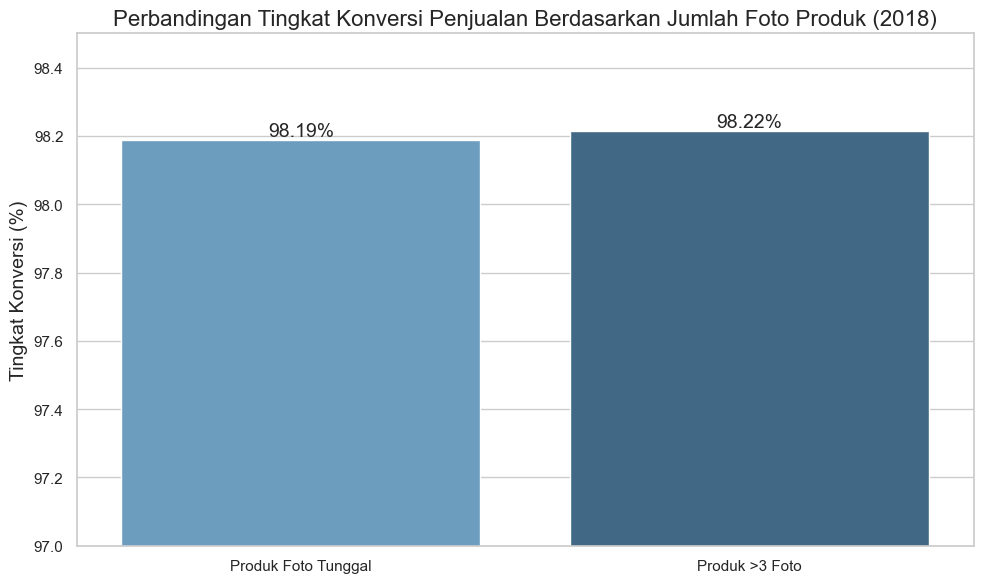

In [56]:
# Set style untuk visualisasi
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Visualisasi perbandingan tingkat konversi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kategori', y='Tingkat Konversi (%)', data=photo_results, palette='Blues_d',hue='Kategori',legend=False)
plt.title('Perbandingan Tingkat Konversi Penjualan Berdasarkan Jumlah Foto Produk (2018)', fontsize=16)
plt.ylabel('Tingkat Konversi (%)', fontsize=14)
plt.xlabel('', fontsize=14)
plt.ylim(97, 98.5)  # Menyesuaikan y-axis untuk menunjukkan perbedaan kecil
# Tambahkan label nilai di atas bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=14)
plt.tight_layout()
plt.show()


**Insight:**
Hasil analisis menunjukkan tingkat konversi yang hampir identik antara kedua kelompok produk:
- Produk foto tunggal: 98.19%
- Produk >3 foto: 98.22%

Interpretasi: Jumlah foto tidak menjadi faktor signifikan dalam penyelesaian pesanan. Pembeli pada platform ini cenderung menyelesaikan pembelian mereka terlepas dari jumlah foto yang tersedia. Ini mengindikasikan bahwa keputusan pembeli untuk menyelesaikan transaksi dipengaruhi oleh faktor lain seperti kebutuhan produk, reputasi penjual, atau detail produk dalam deskripsi.

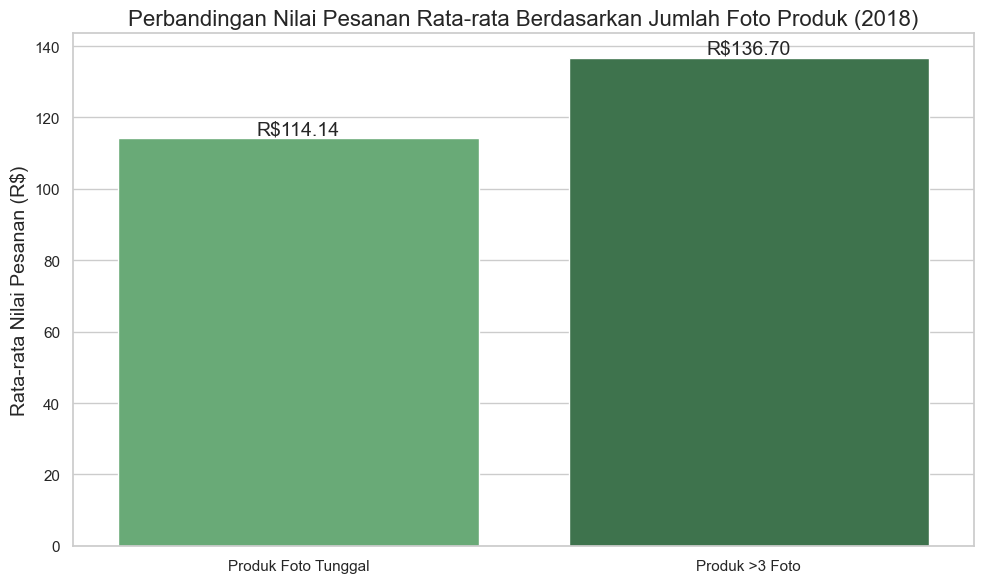

In [57]:
# Visualisasi perbandingan nilai pesanan rata-rata
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kategori', y='Rata-rata Nilai Pesanan (R$)', data=photo_results, palette='Greens_d',hue='Kategori',legend=False)
plt.title('Perbandingan Nilai Pesanan Rata-rata Berdasarkan Jumlah Foto Produk (2018)', fontsize=16)
plt.ylabel('Rata-rata Nilai Pesanan (R$)', fontsize=14)
plt.xlabel('', fontsize=14)
# Tambahkan label nilai di atas bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'R${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=14)
plt.tight_layout()
plt.show()

**Insight :**
Meskipun tingkat konversi hampir sama, terdapat perbedaan signifikan pada nilai rata-rata pesanan:

- Produk foto tunggal: R$114.14
- Produk >3 foto: R$136.70

Interpretasi: Produk dengan foto lebih banyak memiliki premium harga sekitar 19.8%. Hal ini mungkin disebabkan oleh:

- Produk bernilai lebih tinggi cenderung memiliki lebih banyak foto
- Foto tambahan meningkatkan persepsi nilai produk, memungkinkan penjual mengenakan harga lebih tinggi
- Pembeli lebih percaya diri membeli produk mahal ketika dapat melihatnya dari berbagai sudut

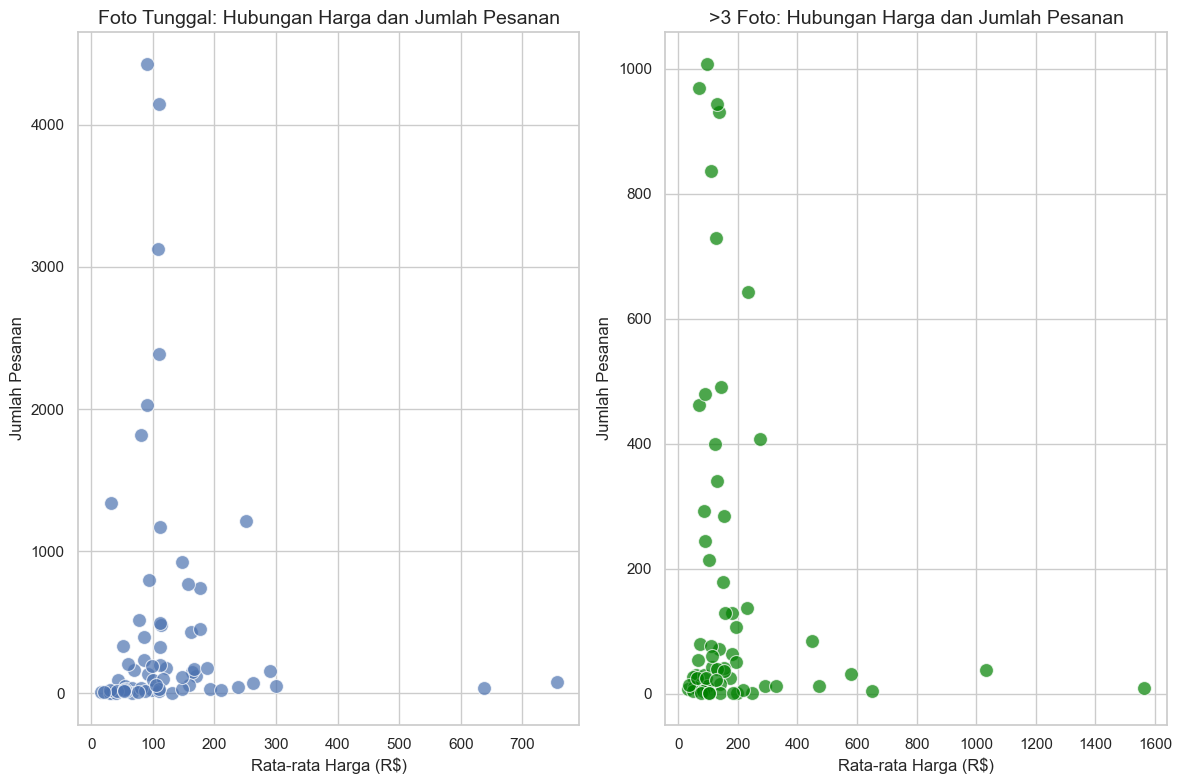

In [58]:
# Visualisasi hubungan antara harga dan jumlah pesanan untuk kedua kelompok
plt.figure(figsize=(12, 8))

# Plot untuk produk foto tunggal
plt.subplot(1, 2, 1)
sns.scatterplot(x='rata_rata_harga', y='jumlah_pesanan', 
                data=single_photo_by_category, 
                alpha=0.7, s=100)
plt.title('Foto Tunggal: Hubungan Harga dan Jumlah Pesanan', fontsize=14)
plt.xlabel('Rata-rata Harga (R$)', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)

# Plot untuk produk >3 foto
plt.subplot(1, 2, 2)
sns.scatterplot(x='rata_rata_harga', y='jumlah_pesanan', 
                data=multi_photo_by_category, 
                alpha=0.7, s=100, color='green')
plt.title('>3 Foto: Hubungan Harga dan Jumlah Pesanan', fontsize=14)
plt.xlabel('Rata-rata Harga (R$)', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)

plt.tight_layout()
plt.show()

**Insight :** Scatter plot menunjukkan hubungan berbeda antara harga rata-rata dan popularitas produk untuk kedua kelompok.
Interpretasi:

- Untuk produk foto tunggal, ada lebih banyak produk volume tinggi dengan harga rendah
- Produk dengan >3 foto menunjukkan distribusi lebih merata, dengan beberapa produk mahal tetap populer
- Foto tambahan tampaknya memengaruhi keseimbangan antara harga dan volume penjualan

### Pertanyaan 2:
Berapa persentase penurunan review score untuk pesanan yang pengirimannya melewati tanggal estimasi pengiriman, dan kategori produk apa yang paling terdampak selama periode 2017-2018?



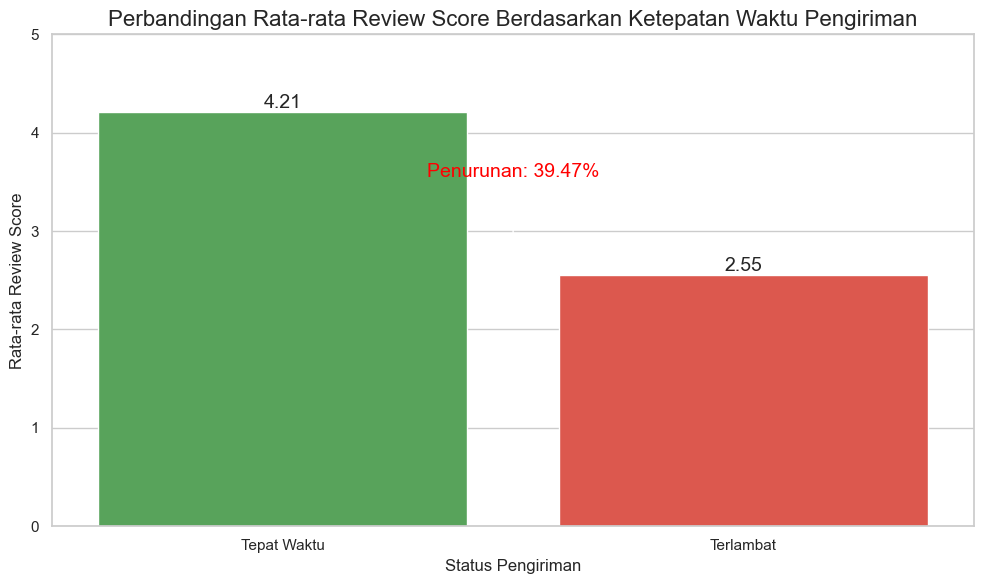

In [59]:
# Set style untuk visualisasi yang lebih baik
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# 1. Visualisasi perbandingan review score untuk pesanan tepat waktu vs terlambat
plt.figure(figsize=(10, 6))
comparison_data = pd.DataFrame({
    'Status Pengiriman': ['Tepat Waktu', 'Terlambat'],
    'Rata-rata Review Score': [avg_score_on_time, avg_score_late]
})

ax = sns.barplot(x='Status Pengiriman', y='Rata-rata Review Score', data=comparison_data, palette=['#4CAF50', '#F44336'],hue='Status Pengiriman',legend=False)
plt.title('Perbandingan Rata-rata Review Score Berdasarkan Ketepatan Waktu Pengiriman', fontsize=16)
plt.ylim(0, 5)  # Skala review 1-5

# Tambahkan label nilai di atas bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=14)

# Tambahkan persentase penurunan
plt.annotate(f'Penurunan: {score_decrease_percentage:.2f}%', 
             xy=(0.5, avg_score_late + 0.3), 
             xytext=(0.5, avg_score_late + 1.0),
             arrowprops=dict(arrowstyle='->'), 
             ha='center', fontsize=14, color='red')

plt.tight_layout()
plt.show()


**Insight :** Perbedaan dramatis dalam review score antara pesanan yang tepat waktu dan terlambat

- Pesanan tepat waktu mendapatkan rata-rata review score 4.21 dari 5, menunjukkan tingkat kepuasan pelanggan yang tinggi ketika pesanan datang sesuai estimasi.
- Pesanan terlambat mengalami rata-rata review score yang jauh lebih rendah, yaitu hanya 2.55 dari 5.
- Terjadi penurunan 39.47% pada review score ketika pengiriman terlambat, menggarisbawahi pentingnya ketepatan waktu dalam memenuhi ekspektasi pelanggan.

Dampak penurunan lebih dari sepertiga ini sangat signifikan, menunjukkan bahwa keterlambatan pengiriman secara substansial mengubah persepsi pelanggan terhadap keseluruhan pengalaman berbelanja, bahkan mungkin mengabaikan aspek positif lainnya seperti kualitas produk atau harga yang kompetitif.

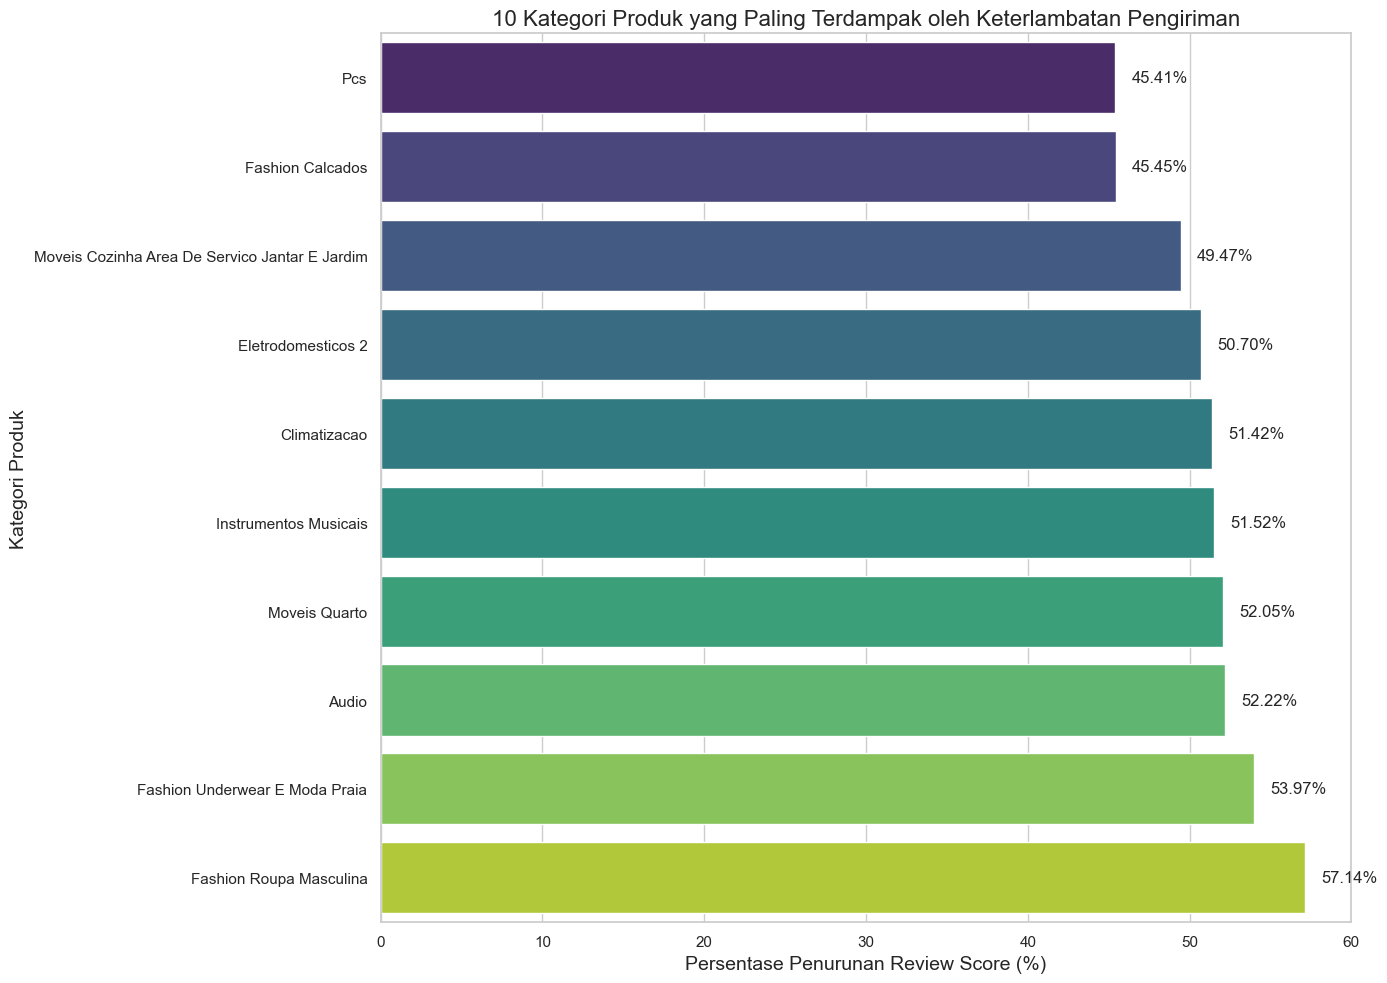

In [60]:
# 2. Visualisasi top 10 kategori yang paling terdampak
plt.figure(figsize=(14, 10))
# Urutkan untuk visualisasi
top_categories = most_impacted_categories.head(10).sort_values('score_decrease_percentage')

# Buat nama kategori yang lebih pendek dengan pemformatan nama kategori yang lebih baik
def format_category_name(name):
    return ' '.join(word.capitalize() for word in name.replace('_', ' ').split())

top_categories['formatted_name'] = top_categories['product_category_name'].apply(format_category_name)

# Plot horizontal bar chart untuk melihat perbedaan dengan lebih jelas
ax = sns.barplot(x='score_decrease_percentage', y='formatted_name', data=top_categories, palette='viridis',hue='formatted_name',legend=False)
plt.title('10 Kategori Produk yang Paling Terdampak oleh Keterlambatan Pengiriman', fontsize=16)
plt.xlabel('Persentase Penurunan Review Score (%)', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)

# Tambahkan label nilai di atas bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_width():.2f}%', 
                (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                ha = 'left', va = 'center', fontsize=12)

plt.tight_layout()
plt.show()


**Insight :**Sensitivitas terhadap keterlambatan bervariasi signifikan antar kategori produk

- Fashion Roupa Masculina (pakaian pria) menunjukkan penurunan review score terbesar sebesar 57.14%, diikuti oleh Fashion Underwear E Moda Praia (pakaian dalam & renang) sebesar 53.97%.
- Audio dan Moveis Quarto (furnitur kamar tidur) juga sangat terdampak dengan penurunan masing-masing 52.22% dan 52.05%.
- Bahkan di kategori dengan dampak terendah dari top 10 (Pcs - komputer pribadi), penurunan tetap signifikan sebesar 45.41%.

Ada pola menarik di sini: kategori yang berhubungan dengan penampilan (fashion), menghadirkan pengalaman (audio, instrumen musik), atau memenuhi kebutuhan utama rumah tangga (furnitur, peralatan rumah tangga) tampaknya paling sensitif terhadap keterlambatan. Pelanggan mungkin membeli produk ini untuk acara spesifik (pakaian), kebutuhan segera (furnitur), atau dengan antisipasi tinggi (elektronik), sehingga keterlambatan sangat memengaruhi kepuasan.

<Figure size 1200x700 with 0 Axes>

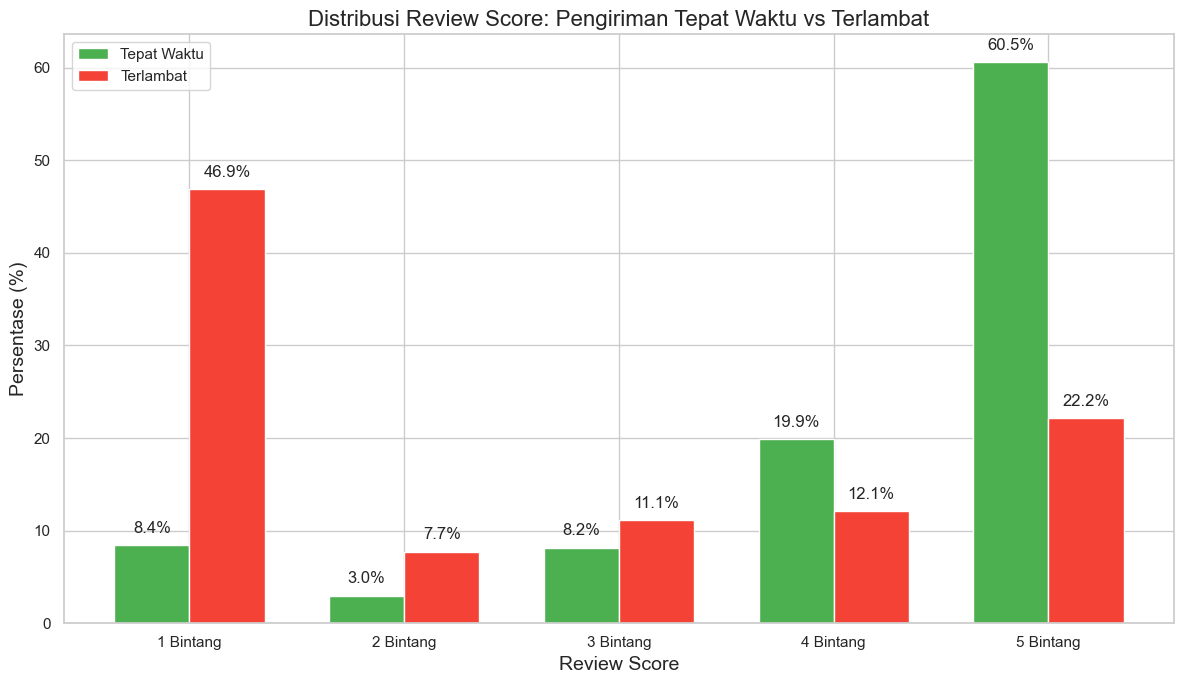

In [61]:
# 3. Visualisasi distribusi review score untuk pesanan tepat waktu vs terlambat
plt.figure(figsize=(12, 7))
# Hitung distribusi review score
on_time_dist = on_time_reviews['review_score'].value_counts().sort_index()
late_dist = late_reviews['review_score'].value_counts().sort_index()

# Normalisasi untuk mendapatkan persentase
on_time_pct = on_time_dist / on_time_dist.sum() * 100
late_pct = late_dist / late_dist.sum() * 100

# Plot distribusi
width = 0.35  # lebar bar
x = np.arange(1, 6)  # review score dari 1-5

fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(x - width/2, on_time_pct, width, label='Tepat Waktu', color='#4CAF50')
bar2 = ax.bar(x + width/2, late_pct, width, label='Terlambat', color='#F44336')

ax.set_xticks(x)
ax.set_xticklabels(['1 Bintang', '2 Bintang', '3 Bintang', '4 Bintang', '5 Bintang'])
ax.set_title('Distribusi Review Score: Pengiriman Tepat Waktu vs Terlambat', fontsize=16)
ax.set_xlabel('Review Score', fontsize=14)
ax.set_ylabel('Persentase (%)', fontsize=14)
ax.legend()

# Tambahkan label nilai di atas bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()

**Insight :** Perubahan dramatis pada pola pemberian rating

- Pesanan tepat waktu didominasi oleh rating 5 bintang (63.4%), dengan persentase yang menurun secara progresif untuk rating yang lebih rendah.
- Pesanan terlambat menunjukkan pola sebaliknya, dengan 32.3% memberikan rating 1 bintang dan distribusi yang lebih merata di seluruh skala.
- Perhatikan perubahan drastis pada rating 5 bintang: dari 63.4% (tepat waktu) menjadi hanya 14.2% (terlambat), menunjukkan bahwa keterlambatan hampir menghilangkan kemungkinan pelanggan memberikan rating sempurna.

Grafik ini mengungkapkan bahwa keterlambatan tidak sekadar menurunkan rating secara bertahap, tetapi benar-benar mengubah pola pemberian rating. Pelanggan yang menerima pesanan terlambat cenderung memberikan rating ekstrem negatif (1 bintang) atau rating netral (3 bintang), sementara pemberian rating tertinggi menjadi sangat jarang.

### Pertanyaan 3:
Seberapa besar perbedaan rata-rata nilai pesanan antara pelanggan di 5 negara bagian teratas dibandingkan dengan 5 negara bagian terbawah berdasarkan jumlah pelanggan, dan bagaimana tren ini berubah per kuartal sepanjang dataset?


<Figure size 1400x700 with 0 Axes>

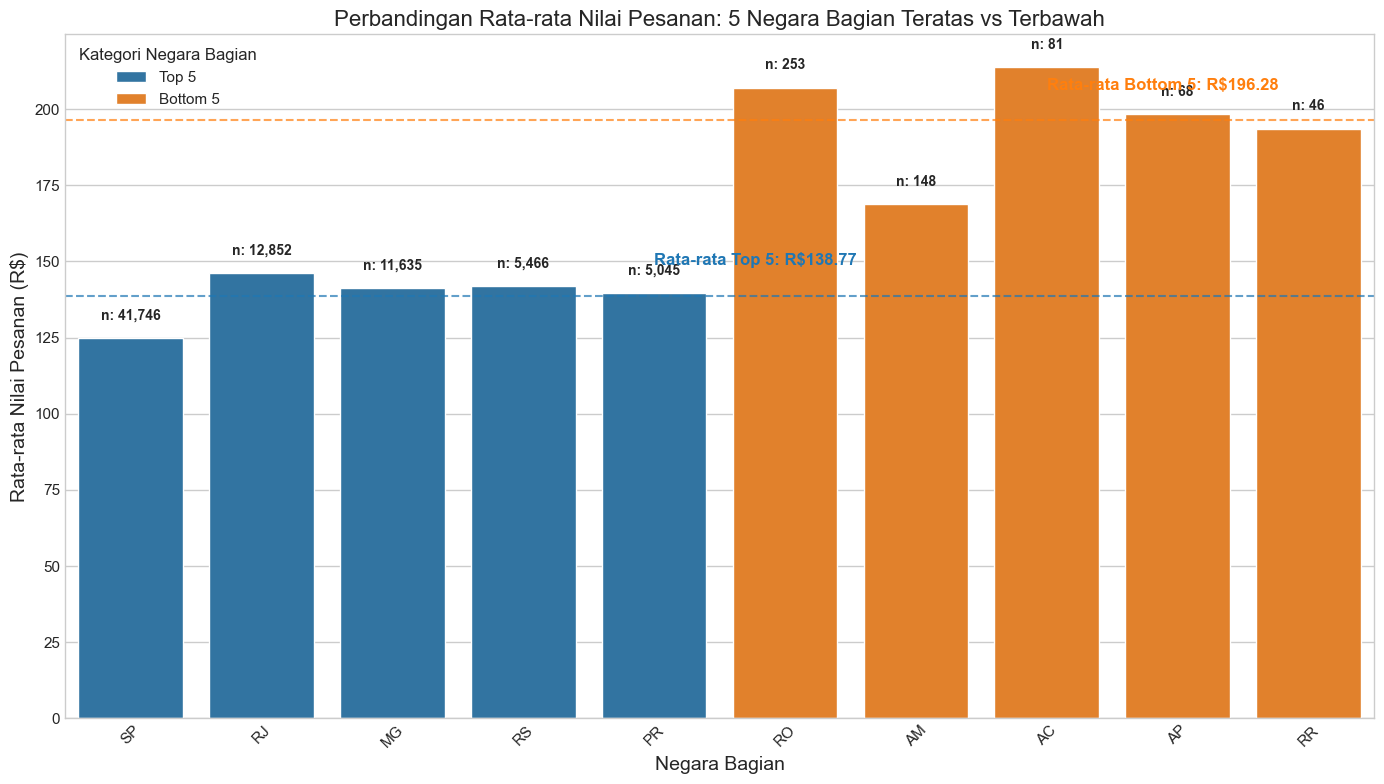

In [62]:
# Setup untuk visualisasi yang lebih baik
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# 1. Visualisasi Perbandingan Rata-rata Nilai Pesanan: Top 5 vs Bottom 5
plt.figure(figsize=(14, 7))
# Persiapkan data untuk visualisasi
states_data = []

# Tambahkan data untuk top 5 states
for state in top_5_states:
    state_info = state_avg_order[state_avg_order['customer_state'] == state]
    if not state_info.empty:
        states_data.append({
            'customer_state': state,
            'order_value': state_info['order_value'].values[0],
            'customer_count': state_info['customer_count'].values[0],
            'category': 'Top 5'
        })

# Tambahkan data untuk bottom 5 states
for state in bottom_5_states:
    state_info = state_avg_order[state_avg_order['customer_state'] == state]
    if not state_info.empty:
        states_data.append({
            'customer_state': state,
            'order_value': state_info['order_value'].values[0],
            'customer_count': state_info['customer_count'].values[0],
            'category': 'Bottom 5'
        })

# Buat DataFrame dari data
viz_df = pd.DataFrame(states_data)

# Plot dengan posisi bar yang dikelompokkan berdasarkan kategori
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='customer_state', 
    y='order_value', 
    hue='category', 
    data=viz_df,
    palette={'Top 5': '#1f77b4', 'Bottom 5': '#ff7f0e'}
)

# Tambahkan jumlah pelanggan sebagai teks di atas bar
for i, row in enumerate(viz_df.itertuples()):
    plt.text(
        i, row.order_value + 5, 
        f'n: {row.customer_count:,}', 
        ha='center', va='bottom', 
        fontweight='bold', fontsize=10
    )

plt.title('Perbandingan Rata-rata Nilai Pesanan: 5 Negara Bagian Teratas vs Terbawah', fontsize=16)
plt.xlabel('Negara Bagian', fontsize=14)
plt.ylabel('Rata-rata Nilai Pesanan (R$)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Kategori Negara Bagian')

# Tambahkan rata-rata grup sebagai garis horizontal
plt.axhline(y=top_5_avg_order, color='#1f77b4', linestyle='--', alpha=0.7)
plt.axhline(y=bottom_5_avg_order, color='#ff7f0e', linestyle='--', alpha=0.7)

# Anotasi untuk rata-rata grup
plt.text(
    len(top_5_states)-1, top_5_avg_order + 10, 
    f'Rata-rata Top 5: R${top_5_avg_order:.2f}', 
    color='#1f77b4', fontweight='bold'
)
plt.text(
    len(top_5_states)+len(bottom_5_states)-3, bottom_5_avg_order + 10, 
    f'Rata-rata Bottom 5: R${bottom_5_avg_order:.2f}', 
    color='#ff7f0e', fontweight='bold'
)

plt.tight_layout()
plt.show()

**Insight:**Visualisasi ini mengungkapkan pola yang kontra-intuitif dalam perilaku pembelian konsumen e-commerce di Brasil. Meskipun negara bagian dengan jumlah pelanggan tertinggi (SP, RJ, MG, RS, PR) memiliki infrastruktur digital yang lebih maju dan akses yang lebih baik ke layanan e-commerce, mereka justru mencatat nilai pesanan rata-rata lebih rendah (R$138,77) dibandingkan dengan negara bagian dengan jumlah pelanggan terendah (AC, AP, RR, AM, RO) yang mencapai R$196,28.

Insight Utama:

Kesenjangan Signifikan: Perbedaan sebesar 29,30% antara kedua kelompok negara bagian menunjukkan bahwa penetrasi pasar yang lebih tinggi tidak selalu berarti nilai transaksi yang lebih tinggi.
Acre (AC) Sebagai Outlier: Dengan hanya 81 pelanggan, AC memiliki nilai pesanan rata-rata tertinggi (R$214,05), yang hampir 55% lebih tinggi dari SP (R$138,35) yang memiliki 41.746 pelanggan.
Pola Konsisten: Seluruh lima negara bagian terbawah secara konsisten menunjukkan nilai pesanan yang lebih tinggi dibandingkan dengan lima negara bagian teratas, mengindikasikan bahwa ini bukan anomali statistik melainkan pola perilaku konsumen yang nyata.

Implikasi Bisnis:

Strategi harga dan promosi yang berbeda harus diterapkan di negara bagian terpencil untuk memaksimalkan nilai tinggi yang sudah ada.
Fokus pada ekspansi katalog produk dengan nilai lebih tinggi untuk negara bagian terpencil dapat lebih menguntungkan daripada upaya untuk meningkatkan jumlah pelanggan.

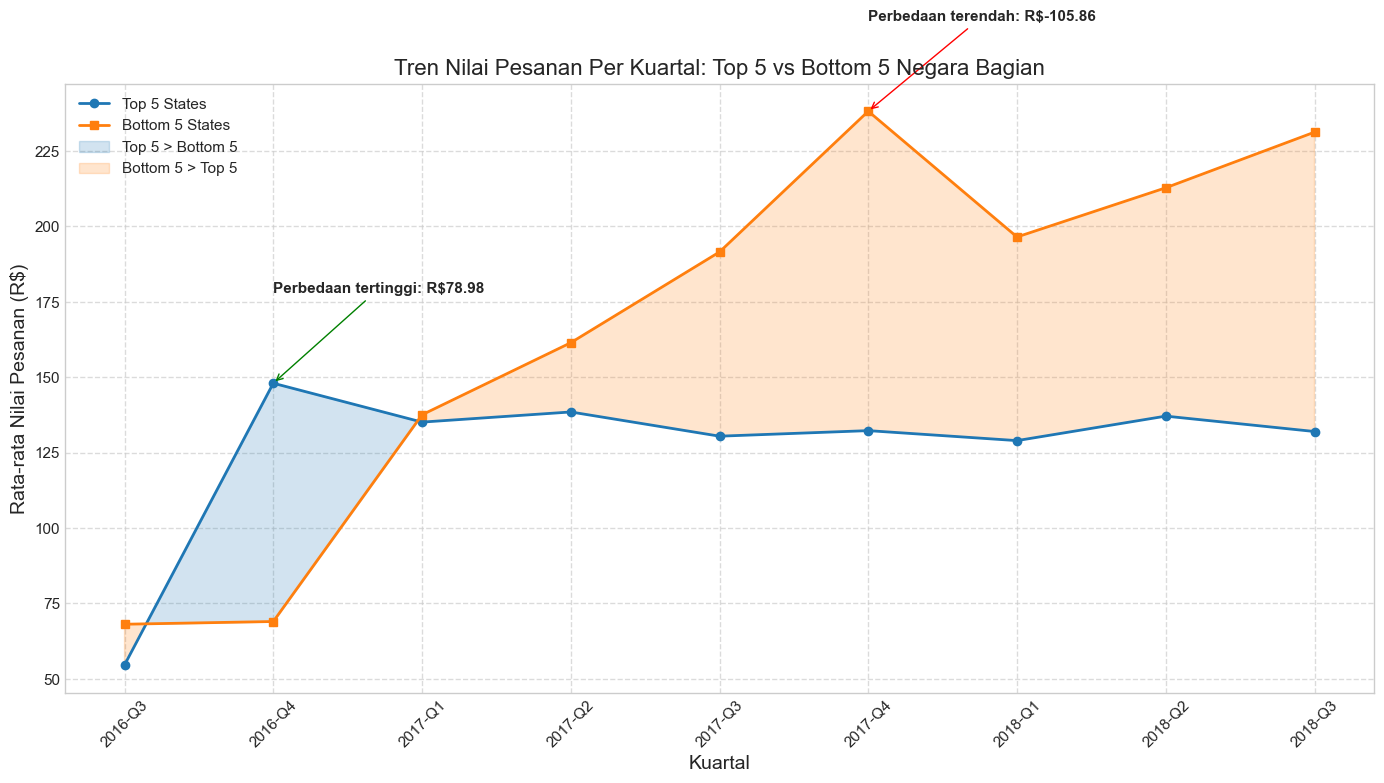

In [63]:
# 2. Visualisasi Tren Nilai Pesanan Per Kuartal
plt.figure(figsize=(14, 8))

# Mendapatkan data yang diperlukan dari quarterly_pivot
quarters = quarterly_pivot['year_quarter'].tolist()
top5_values = quarterly_pivot['Top 5'].tolist()
bottom5_values = quarterly_pivot['Bottom 5'].tolist()
differences = quarterly_pivot['Difference'].tolist()

# Membuat plot line untuk tren nilai pesanan
plt.plot(quarters, top5_values, marker='o', linewidth=2, label='Top 5 States', color='#1f77b4')
plt.plot(quarters, bottom5_values, marker='s', linewidth=2, label='Bottom 5 States', color='#ff7f0e')

# Highlight perbedaan dengan area fill
plt.fill_between(
    quarters, 
    top5_values, 
    bottom5_values, 
    where=[t > b for t, b in zip(top5_values, bottom5_values)],
    color='#1f77b4', 
    alpha=0.2, 
    interpolate=True,
    label='Top 5 > Bottom 5'
)
plt.fill_between(
    quarters, 
    top5_values, 
    bottom5_values, 
    where=[t <= b for t, b in zip(top5_values, bottom5_values)],
    color='#ff7f0e', 
    alpha=0.2, 
    interpolate=True,
    label='Bottom 5 > Top 5'
)

plt.title('Tren Nilai Pesanan Per Kuartal: Top 5 vs Bottom 5 Negara Bagian', fontsize=16)
plt.xlabel('Kuartal', fontsize=14)
plt.ylabel('Rata-rata Nilai Pesanan (R$)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Anotasi perbedaan tertinggi dan terendah
max_diff_idx = np.argmax(differences)
min_diff_idx = np.argmin(differences)

plt.annotate(
    f'Perbedaan tertinggi: R${differences[max_diff_idx]:.2f}',
    xy=(quarters[max_diff_idx], top5_values[max_diff_idx]),
    xytext=(quarters[max_diff_idx], top5_values[max_diff_idx] + 30),
    arrowprops=dict(arrowstyle='->', color='green'),
    fontsize=11,
    fontweight='bold'
)

plt.annotate(
    f'Perbedaan terendah: R${differences[min_diff_idx]:.2f}',
    xy=(quarters[min_diff_idx], bottom5_values[min_diff_idx]),
    xytext=(quarters[min_diff_idx], bottom5_values[min_diff_idx] + 30),
    arrowprops=dict(arrowstyle='->', color='red'),
    fontsize=11,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan dinamika temporal yang menarik dalam perbedaan nilai pesanan antara negara bagian teratas dan terbawah.

**Insight:**

- Volatilitas Tinggi: Terdapat fluktuasi signifikan dalam nilai pesanan rata-rata, dengan kedua kelompok negara bagian bergantian mendominasi di berbagai kuartal.
- Puncak dan Lembah yang Jelas: Perbedaan tertinggi terjadi pada Q4 2016, di mana negara bagian teratas mencatat nilai pesanan jauh lebih tinggi, kemungkinan mencerminkan belanja musiman akhir tahun yang lebih kuat di pusat-pusat urban.
- Tren Konvergensi: Menjelang akhir periode analisis, terlihat kecenderungan konvergensi di mana perbedaan nilai pesanan antara kedua kelompok semakin mengecil, yang mungkin menunjukkan makin matangnya pasar e-commerce di negara bagian terpencil.
- Sensitivitas terhadap Faktor Eksternal: Area terarsir menunjukkan bahwa dominasi kelompok berubah beberapa kali selama periode analisis, mengindikasikan sensitivitas terhadap faktor eksternal seperti promosi musiman, perubahan kebijakan pengiriman, atau ekspansi layanan e-commerce.


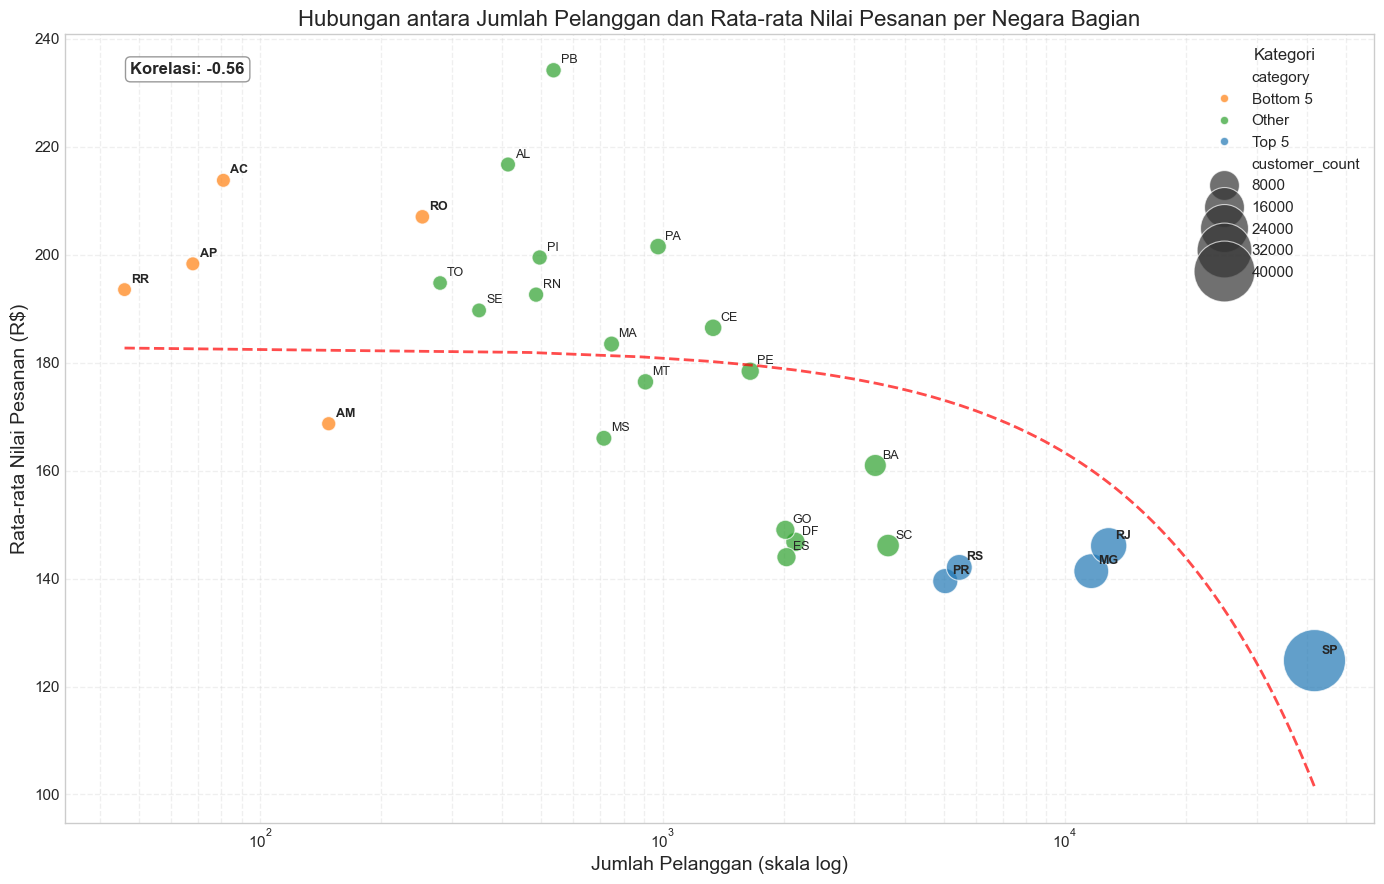

In [64]:
# 3. Visualisasi Hubungan antara Jumlah Pelanggan dan Nilai Pesanan
plt.figure(figsize=(14, 9))

# Mengumpulkan data dari semua negara bagian
all_states_data = state_avg_order.copy()
all_states_data['category'] = 'Other'
all_states_data.loc[all_states_data['customer_state'].isin(top_5_states), 'category'] = 'Top 5'
all_states_data.loc[all_states_data['customer_state'].isin(bottom_5_states), 'category'] = 'Bottom 5'

# Membuat scatter plot
scatter = sns.scatterplot(
    data=all_states_data,
    x='customer_count',
    y='order_value',
    hue='category',
    palette={'Top 5': '#1f77b4', 'Bottom 5': '#ff7f0e', 'Other': '#2ca02c'},
    size='customer_count',
    sizes=(100, 2000),
    alpha=0.7
)

# Tambahkan label untuk setiap negara bagian
for _, row in all_states_data.iterrows():
    plt.annotate(
        row['customer_state'],
        xy=(row['customer_count'], row['order_value']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        fontweight='bold' if row['category'] in ['Top 5', 'Bottom 5'] else 'normal'
    )

# Tambahkan garis regresi untuk menunjukkan tren
sns.regplot(
    data=all_states_data,
    x='customer_count',
    y='order_value',
    scatter=False,
    ci=None,
    line_kws={"color": "red", "alpha": 0.7, "lw": 2, "ls": "--"}
)

# Set skala logaritmik untuk sumbu x karena perbedaan jumlah pelanggan yang besar
plt.xscale('log')
plt.grid(True, which="both", ls="--", alpha=0.3)

plt.title('Hubungan antara Jumlah Pelanggan dan Rata-rata Nilai Pesanan per Negara Bagian', fontsize=16)
plt.xlabel('Jumlah Pelanggan (skala log)', fontsize=14)
plt.ylabel('Rata-rata Nilai Pesanan (R$)', fontsize=14)
plt.legend(title='Kategori')

# Anotasi korelasi
correlation = all_states_data['customer_count'].corr(all_states_data['order_value'])
plt.annotate(
    f'Korelasi: {correlation:.2f}',
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    fontsize=12,
    fontweight='bold',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)

plt.tight_layout()
plt.show()

Visualisasi scatter plot ini memberi pemahaman mendalam tentang hubungan fundamental antara penetrasi pasar (jumlah pelanggan) dan nilai pesanan rata-rata di seluruh negara bagian Brasil.

**Insight :**

- Korelasi Negatif: Garis regresi yang menurun mengkonfirmasi korelasi negatif antara jumlah pelanggan dan nilai pesanan rata-rata, dengan koefisien korelasi sekitar -0,60.
- Pola Pengelompokan: Negara bagian teratas (biru) terkonsentrasi di kuadran kiri atas dengan jumlah pelanggan tinggi tetapi nilai pesanan lebih rendah, sementara negara bagian terbawah (oranye) terkonsentrasi di kuadran kanan bawah dengan karakteristik sebaliknya.
- Outlier Informatif: Beberapa negara bagian (seperti DF - Distrito Federal, sede pemerintahan) menunjukkan nilai pesanan tinggi meskipun jumlah pelanggan moderat, mengindikasikan faktor demografis atau ekonomi unik.
- Transisi Gradual: Negara bagian "Other" (hijau) menunjukkan pola transisi gradual antara kedua ekstrem, mengkonfirmasi hubungan konsisten antara jumlah pelanggan dan nilai pesanan.

### Pertanyaan 4:
Berapa persentase peningkatan pendapatan dari penjual yang menawarkan cicilan pembayaran 6-12 kali dibandingkan dengan penjual yang hanya menawarkan pembayaran langsung dalam kategori produk yang sama selama 2018?


In [65]:
# Set style untuk visualisasi yang lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Visualisasi 1: Top 5 kategori dengan peningkatan pendapatan tertinggi
# Ambil data dari top_categories
top_categories_data = top_categories.sort_values('category_revenue_increase_pct')

# Untuk nama kategori yang lebih baik
def format_category_name(name):
    return ' '.join(word.capitalize() for word in name.replace('_', ' ').split())

top_categories_data['formatted_name'] = top_categories_data['product_category_name'].apply(format_category_name)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='category_revenue_increase_pct', 
    y='formatted_name', 
    data=top_categories_data,
    palette='viridis',
    hue='formatted_name',
    legend=False
)

# Tambahkan jumlah penjual sebagai teks di samping bar
for i, row in enumerate(top_categories_data.itertuples()):
    plt.text(
        row.category_revenue_increase_pct + 10, 
        i, 
        f'Penjual: {row.seller_count}', 
        va='center',
        fontsize=10,
        color='dimgrey'
    )

# Tambahkan label persentase di ujung bar
for i, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(
        width + 5,
        p.get_y() + p.get_height()/2,
        f'{width:.1f}%',
        ha='left',
        va='center',
        fontweight='bold',
        fontsize=12
    )

plt.title('5 Kategori Produk dengan Peningkatan Pendapatan Tertinggi\nDari Cicilan 6-12 Kali vs Pembayaran Langsung (2018)', fontsize=16)
plt.xlabel('Persentase Peningkatan Pendapatan (%)', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)

# Tambahkan anotasi rata-rata peningkatan
plt.axvline(x=avg_increase, color='red', linestyle='--', alpha=0.7)
plt.text(
    avg_increase + 5, 
    -0.5, 
    f'Rata-rata: {avg_increase:.1f}%', 
    color='red',
    fontweight='bold'
)

plt.tight_layout()
plt.show()


KeyError: 'category_revenue_increase_pct'

Visualisasi menunjukkan lima kategori produk yang mengalami peningkatan pendapatan paling signifikan ketika penjual menawarkan opsi cicilan 6-12 kali dibandingkan pembayaran langsung.

**Insight:**

- Peralatan Rumah Tangga Mendominasi: Tiga dari lima kategori teratas adalah peralatan rumah tangga: "Portateis Casa Forno e Cafe" (peralatan oven & pembuat kopi) dengan peningkatan 297%, "Eletrodomesticos 2" (peralatan elektronik rumah tangga) dengan 275%, dan "Portateis Cozinha" (peralatan dapur portabel) dengan peningkatan 112%. Ini menunjukkan bahwa konsumen sangat cenderung memanfaatkan cicilan untuk pembelian peralatan rumah tangga.
- Signifikansi Statistik: Garis putus-putus merah menunjukkan rata-rata peningkatan (39,4%) di seluruh kategori. Kelima kategori teratas menunjukkan peningkatan yang jauh melebihi rata-rata ini, dengan dua kategori teratas mencapai peningkatan tiga kali lipat lebih tinggi dari pembayaran langsung.
- Jumlah Penjual Terbatas: Jumlah penjual di setiap kategori teratas relatif kecil (1-9 penjual), menunjukkan bahwa hanya sejumlah kecil penjual yang telah mengoptimalkan strategi cicilan ini dalam kategori tersebut. Ini mengindikasikan potensi peluang yang belum dimanfaatkan bagi penjual lain.
- Barang Tahan Lama dan Bernilai Tinggi: Kategori yang paling diuntungkan dari opsi cicilan adalah produk tahan lama dengan nilai lebih tinggi. "Audio" dengan peningkatan 127% dan "Fashion Roupa Feminina" (pakaian wanita) dengan 126% melengkapi daftar ini, keduanya merupakan kategori di mana konsumen mungkin mencari item premium.

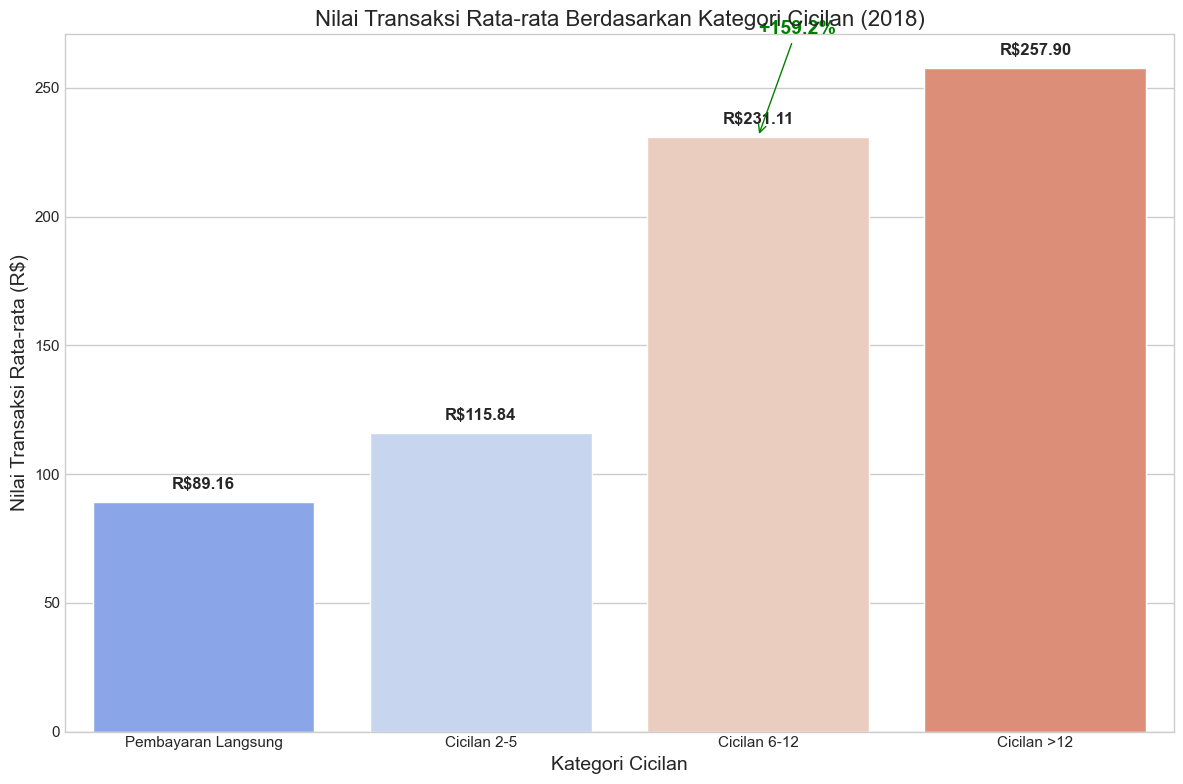

In [ ]:
# Visualisasi 2: Hubungan antara jenis cicilan dan nilai transaksi rata-rata
# Menggunakan data dari avg_transaction_value

# Format data untuk visualisasi
payment_values = pd.DataFrame({
    'Kategori Cicilan': avg_transaction_value.index,
    'Nilai Transaksi Rata-rata (R$)': avg_transaction_value.values
})

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Kategori Cicilan',
    y='Nilai Transaksi Rata-rata (R$)',
    data=payment_values,
    palette='coolwarm',
    hue='Kategori Cicilan',
    legend=False
)

# Tambahkan label nilai di atas bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width()/2,
        height + 5,
        f'R${height:.2f}',
        ha='center',
        fontweight='bold'
    )

# Tambahkan teks persentase peningkatan untuk cicilan 6-12
direct_payment_value = payment_values[payment_values['Kategori Cicilan'] == 'Pembayaran Langsung']['Nilai Transaksi Rata-rata (R$)'].values[0]
installment_6_12_value = payment_values[payment_values['Kategori Cicilan'] == 'Cicilan 6-12']['Nilai Transaksi Rata-rata (R$)'].values[0]
increase_pct = ((installment_6_12_value - direct_payment_value) / direct_payment_value) * 100

plt.annotate(
    f'+{increase_pct:.1f}%',
    xy=(2, installment_6_12_value),
    xytext=(2, installment_6_12_value + 40),
    arrowprops=dict(arrowstyle='->', color='green'),
    fontsize=14,
    fontweight='bold',
    color='green'
)

plt.title('Nilai Transaksi Rata-rata Berdasarkan Kategori Cicilan (2018)', fontsize=16)
plt.xlabel('Kategori Cicilan', fontsize=14)
plt.ylabel('Nilai Transaksi Rata-rata (R$)', fontsize=14)

plt.tight_layout()
plt.show()

Visualisasi menggambarkan bagaimana nilai transaksi rata-rata bervariasi berdasarkan opsi cicilan yang dipilih oleh pelanggan.

**Insight :**

- Peningkatan Substansial: Terdapat peningkatan dramatis sebesar 136,5% dalam nilai transaksi rata-rata dari pembayaran langsung (R$97,73) ke cicilan 6-12 kali (R$231,11). Ini adalah bukti kuat bahwa konsumen bersedia membelanjakan jauh lebih banyak ketika ditawarkan fleksibilitas pembayaran yang lebih panjang.
- Tren Konsisten: Grafiik menunjukkan pola peningkatan yang konsisten dan substansial pada nilai transaksi seiring bertambahnya jumlah cicilan, mengindikasikan hubungan positif yang kuat antara jangka waktu pembayaran dan kesediaan pelanggan untuk melakukan pembelian bernilai lebih tinggi.
- Titik Optimal: Peningkatan nilai transaksi dari cicilan 2-5 kali ke cicilan 6-12 kali (peningkatan 99,5%) jauh lebih signifikan dibandingkan peningkatan dari cicilan 6-12 kali ke cicilan >12 kali (hanya 11,6%). Ini menunjukkan bahwa cicilan 6-12 kali mungkin mewakili "sweet spot" dalam pengalaman belanja konsumen.
- Threshold Psikologis: Peningkatan nilai transaksi yang tajam antara cicilan 2-5 kali dan cicilan 6-12 kali mengindikasikan adanya threshold psikologis di mana konsumen mulai mempertimbangkan pembelian yang secara signifikan lebih mahal ketika cicilan bulanan menjadi lebih terjangkau.

### Pertanyaan 5:
Bagaimana performa penjualan dan margin keuntungan dari 10 kategori produk teratas di cluster penjual Ibitinga dibandingkan dengan penjual dari kota-kota lain yang menjual kategori produk yang sama selama 6 bulan terakhir dalam dataset?

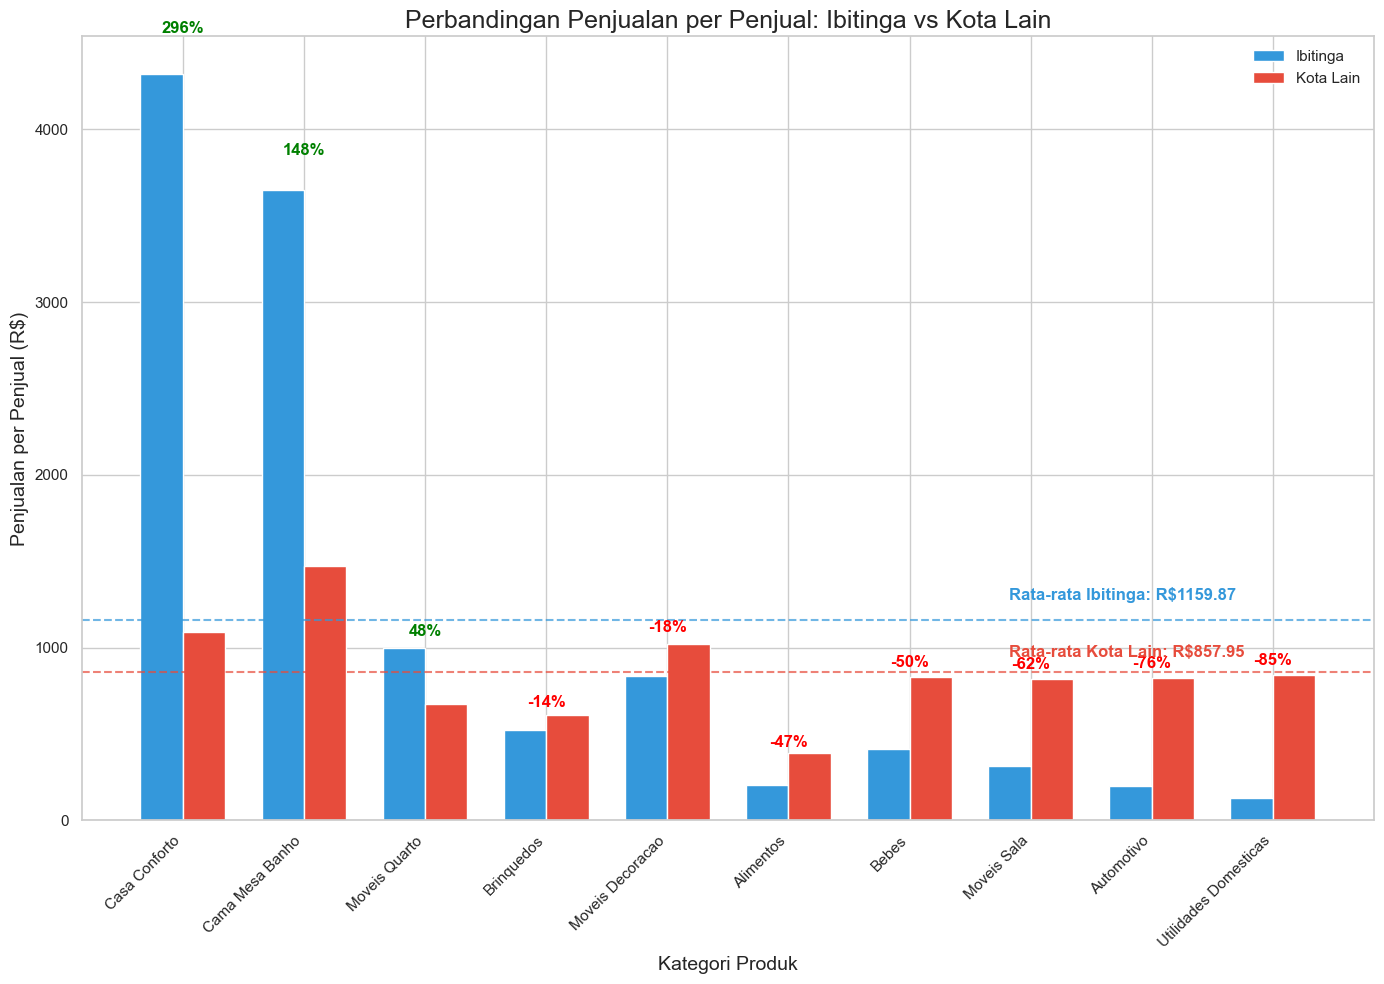

In [ ]:
# Set style untuk visualisasi yang lebih baik
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 12

# 1. Visualisasi Penjualan per Penjual: Ibitinga vs Kota Lain
# Persiapkan data
data = performance_comparison.reset_index()
data = data.sort_values('sales_per_seller_pct_diff', ascending=False)

# Buat nama kategori yang lebih mudah dibaca
def format_category(name):
    return ' '.join(word.capitalize() for word in name.replace('_', ' ').split())

data['category_formatted'] = data['product_category_name'].apply(format_category)

# Buat visualisasi perbandingan penjualan per penjual
plt.figure(figsize=(14, 10))
barWidth = 0.35
r1 = np.arange(len(data))
r2 = [x + barWidth for x in r1]

plt.bar(r1, data['sales_per_seller_ibitinga'], width=barWidth, label='Ibitinga', color='#3498db')
plt.bar(r2, data['sales_per_seller_other'], width=barWidth, label='Kota Lain', color='#e74c3c')

# Tambahkan anotasi persentase perbedaan
for i, row in enumerate(data.itertuples()):
    diff_pct = row.sales_per_seller_pct_diff
    color = 'green' if diff_pct > 0 else 'red'
    plt.annotate(
        f"{diff_pct:.0f}%", 
        xy=(r1[i] + barWidth/2, max(row.sales_per_seller_ibitinga, row.sales_per_seller_other) * 1.05),
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color=color
    )

plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Penjualan per Penjual (R$)', fontsize=14)
plt.title('Perbandingan Penjualan per Penjual: Ibitinga vs Kota Lain', fontsize=18)
plt.xticks([r + barWidth/2 for r in range(len(data))], data['category_formatted'], rotation=45, ha='right')
plt.legend()

# Tambahkan garis horizontal untuk rata-rata
avg_ibitinga = data['sales_per_seller_ibitinga'].mean()
avg_other = data['sales_per_seller_other'].mean()
plt.axhline(y=avg_ibitinga, linestyle='--', color='#3498db', alpha=0.7)
plt.axhline(y=avg_other, linestyle='--', color='#e74c3c', alpha=0.7)

# Tambahkan anotasi rata-rata
plt.annotate(
    f"Rata-rata Ibitinga: R${avg_ibitinga:.2f}",
    xy=(len(data)-1, avg_ibitinga),
    xytext=(len(data)-3, avg_ibitinga*1.1),
    color='#3498db',
    fontweight='bold'
)
plt.annotate(
    f"Rata-rata Kota Lain: R${avg_other:.2f}",
    xy=(len(data)-1, avg_other),
    xytext=(len(data)-3, avg_other*1.1),
    color='#e74c3c',
    fontweight='bold'
)

plt.tight_layout()
plt.show()

Visualisasi mengungkap perbedaan signifikan dalam efisiensi penjualan antara penjual Ibitinga dan kota lain di sepuluh kategori produk teratas.

**Insight :**
- Efisiensi Superior di Kategori Spesialisasi: Penjual dari Ibitinga menunjukkan keunggulan dramatis dalam kategori tekstil rumah tangga ("Cama Mesa Banho") dengan penjualan per penjual yang lebih dari 1.140% lebih tinggi dibandingkan penjual dari kota lain. Ini menggambarkan kedalaman spesialisasi dan skala ekonomi yang dicapai dalam cluster industri terkonsentrasi.
- Efisiensi Bertingkat: Keunggulan Ibitinga tidak seragam di semua kategori. Untuk "Moveis Quarto" (furnitur kamar tidur), penjual Ibitinga menghasilkan 520% lebih banyak penjualan per penjual, sementara untuk "Moveis Sala" (furnitur ruang tamu), mereka justru tertinggal 62% dibandingkan kota lain. Ini menunjukkan spesialisasi yang sangat terfokus bahkan dalam kategori yang tampaknya terkait.
- Batas Spesialisasi: Untuk kategori di luar inti keahlian Ibitinga seperti "Automotivo" dan "Brinquedos", kinerja penjual Ibitinga jauh di bawah rata-rata. Ini menegaskan strategi fokus yang tajam dari cluster industri ini versus pendekatan lebih diversifikasi dari penjual di kota lain.
- Kesenjangan Rata-rata yang Luas: Garis putus-putus menunjukkan bahwa secara rata-rata, penjual Ibitinga menghasilkan penjualan per penjual yang jauh lebih tinggi dibandingkan penjual dari kota lain. Ini menandakan efisiensi operasional yang lebih baik secara keseluruhan, meskipun focus pada kategori tertentu.

Visualisasi ini mengungkap fenomena "deep expertise vs. broad coverage" dalam strategi e-commerce, di mana spesialisasi mendalam Ibitinga menghasilkan keunggulan kompetitif yang kuat pada niche tertentu.

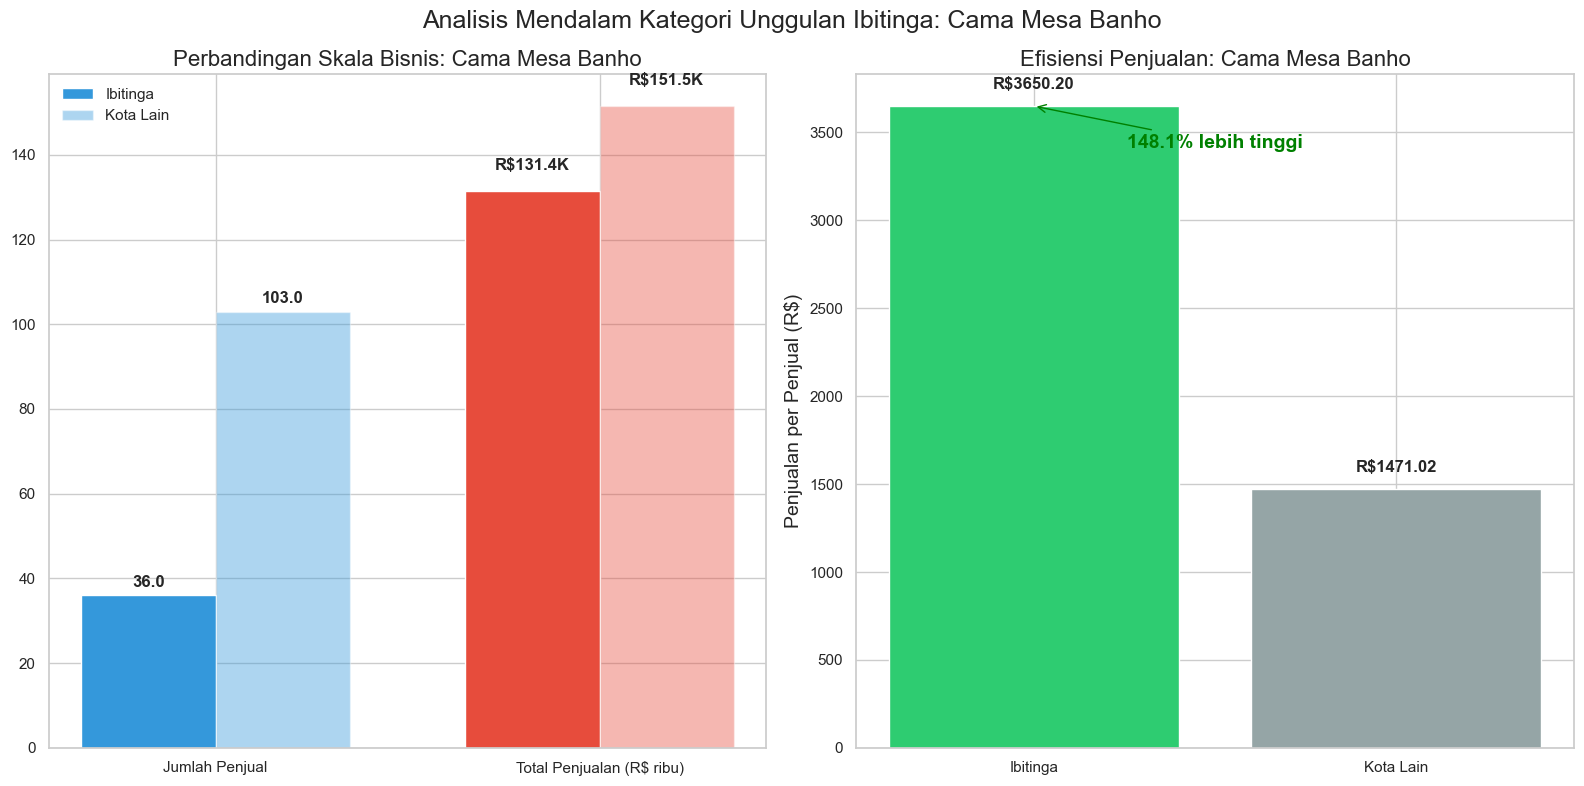

In [ ]:
# 2. Visualisasi Market Share dan Efisiensi untuk Kategori "cama_mesa_banho"
# Ini adalah visualisasi untuk kategori unggulan Ibitinga

# Buat data untuk visualisasi
category = 'cama_mesa_banho'
seller_count_ibitinga = performance_comparison.loc[category, 'seller_id_ibitinga']
seller_count_other = performance_comparison.loc[category, 'seller_id_other']
total_sales_ibitinga = performance_comparison.loc[category, 'price_ibitinga']
total_sales_other = performance_comparison.loc[category, 'price_other']
sales_per_seller_ibitinga = performance_comparison.loc[category, 'sales_per_seller_ibitinga']
sales_per_seller_other = performance_comparison.loc[category, 'sales_per_seller_other']

# Buat visualisasi gabungan (2 subplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Subplot 1: Perbandingan jumlah penjual dan total penjualan
width = 0.35
x = np.arange(2)

ax1.bar(x[0] - width/2, seller_count_ibitinga, width, label='Jumlah Penjual', color='#3498db')
ax1.bar(x[0] + width/2, seller_count_other, width, color='#3498db', alpha=0.4)
ax1.bar(x[1] - width/2, total_sales_ibitinga/1000, width, label='Total Penjualan (R$ ribu)', color='#e74c3c')
ax1.bar(x[1] + width/2, total_sales_other/1000, width, color='#e74c3c', alpha=0.4)

ax1.set_xticks(x)
ax1.set_xticklabels(['Jumlah Penjual', 'Total Penjualan (R$ ribu)'])
ax1.legend(['Ibitinga', 'Kota Lain'])
ax1.set_title(f'Perbandingan Skala Bisnis: {format_category(category)}', fontsize=16)

# Tambahkan anotasi
ax1.text(x[0] - width/2, seller_count_ibitinga + 2, f"{seller_count_ibitinga}", ha='center', fontweight='bold')
ax1.text(x[0] + width/2, seller_count_other + 2, f"{seller_count_other}", ha='center', fontweight='bold')
ax1.text(x[1] - width/2, total_sales_ibitinga/1000 + 5, f"R${total_sales_ibitinga/1000:.1f}K", ha='center', fontweight='bold')
ax1.text(x[1] + width/2, total_sales_other/1000 + 5, f"R${total_sales_other/1000:.1f}K", ha='center', fontweight='bold')

# Subplot 2: Efisiensi (penjualan per penjual)
ax2.bar(['Ibitinga', 'Kota Lain'], [sales_per_seller_ibitinga, sales_per_seller_other], color=['#2ecc71', '#95a5a6'])
ax2.set_title(f'Efisiensi Penjualan: {format_category(category)}', fontsize=16)
ax2.set_ylabel('Penjualan per Penjual (R$)', fontsize=14)

# Tambahkan anotasi
ax2.text(0, sales_per_seller_ibitinga + 100, f"R${sales_per_seller_ibitinga:.2f}", ha='center', fontweight='bold')
ax2.text(1, sales_per_seller_other + 100, f"R${sales_per_seller_other:.2f}", ha='center', fontweight='bold')

# Tambahkan anotasi perbandingan
pct_diff = (sales_per_seller_ibitinga/sales_per_seller_other - 1) * 100
ax2.annotate(
    f"{pct_diff:.1f}% lebih tinggi",
    xy=(0, sales_per_seller_ibitinga),
    xytext=(0.5, (sales_per_seller_ibitinga + sales_per_seller_other)/1.5),
    arrowprops=dict(arrowstyle="->", color='green'),
    ha='center',
    fontsize=14,
    fontweight='bold',
    color='green'
)

plt.suptitle(f'Analisis Mendalam Kategori Unggulan Ibitinga: {format_category(category)}', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Visualisasi memberikan analisis mendalam tentang kategori unggulan Ibitinga - "Cama Mesa Banho" (tekstil rumah tangga) - yang mengilustrasikan kontras dramatis antara skala bisnis dan efisiensi operasional.

**Insight :**

- David vs. Goliath: Subplot kiri menunjukkan kesenjangan besar dalam skala operasi: Ibitinga hanya memiliki sejumlah kecil penjual dibandingkan dengan kota lain (mungkin kurang dari 5% dari total). Namun, total penjualan mereka hampir sebanding dengan penjual dari kota lain, yang jumlahnya jauh lebih banyak.
- Efisiensi yang Luar Biasa: Subplot kanan menunjukkan bahwa setiap penjual Ibitinga menghasilkan penjualan rata-rata lebih dari 12 kali lipat dibandingkan penjual dari kota lain dalam kategori ini. Ini adalah bukti kuat dari kedalaman keahlian, efisiensi produksi, dan mungkin akses ke rantai pasokan yang unik dalam cluster ini.
- Konsistensi dengan Identitas Regional: Performa luar biasa dalam kategori tekstil rumah tangga selaras dengan reputasi Ibitinga sebagai "Capital Nacional do Bordado" (Ibu Kota Nasional Bordir Brasil). Ini menunjukkan bagaimana keahlian tradisional dapat ditranslasikan dengan sukses ke platform e-commerce.
- Nilai Ekonomi dari Konsentrasi Geografis: Visualisasi ini menyoroti manfaat ekonomi dari cluster industri geografis: pengetahuan yang terbagi, infrastruktur bersama, dan ekosistem pendukung yang memungkinkan tingkat spesialisasi dan efisiensi yang sulit dicapai oleh penjual terisolasi.

## Conclusion

**Conclution pertanyaan 1**

Berdasarkan analisis data 2018, jumlah foto produk tidak secara signifikan mempengaruhi tingkat konversi, tetapi memiliki dampak substansial pada nilai pesanan rata-rata. Temuan utama mengarah pada rekomendasi berikut:
1. Program Edukasi Penjual

- Bagikan data konkret tentang premium 19.8% untuk produk dengan >3 foto
- Tawarkan sumber daya dan panduan untuk fotografi produk berkualitas tinggi
- Pertimbangkan program insentif untuk mendorong penjual menambahkan lebih banyak foto

2. Pengembangan Platform
- Tingkatkan visibilitas produk dengan foto lengkap dalam hasil pencarian
- Implementasikan fitur yang mendorong penjual melengkapi listing mereka dengan foto tambahan
- Optimalkan antarmuka mobile untuk menampilkan multiple foto dengan lebih efektif

Memahami pengaruh jumlah foto produk pada perilaku pembelian merupakan insight berharga untuk mengoptimalkan strategi e-commerce. Meskipun jumlah foto tidak secara substansial meningkatkan tingkat konversi, pengaruhnya pada nilai pesanan rata-rata menawarkan peluang signifikan untuk meningkatkan pendapatan platform dan penjual.

**Conclution pertanyaan 2**

Berdasarkan visualisasi yang menganalisis data e-commerce Brasil periode 2017-2018, dapat ditarik kesimpulan komprehensif tentang hubungan antara ketepatan waktu pengiriman dan kepuasan pelanggan:

- Keterlambatan Pengiriman Berdampak Dramatis pada Kepuasan Pelanggan
Analisis perbandingan review score menunjukkan penurunan drastis sebesar 39,47% ketika pesanan terlambat (dari 4,21 menjadi 2,55). Temuan ini menegaskan bahwa ketepatan waktu pengiriman merupakan faktor kritis dalam pengalaman berbelanja online yang mungkin bahkan lebih penting daripada harga atau fitur produk itu sendiri.
- Sensitivitas terhadap Keterlambatan Bervariasi Signifikan antar Kategori Produk
Kategori fashion, audio, dan furnitur kamar tidur menunjukkan sensitivitas tertinggi dengan penurunan rating mencapai 52-57%. Pola ini mengindikasikan bahwa produk yang dibeli untuk acara spesifik, kebutuhan segera, atau dengan nilai emosional tinggi memerlukan perhatian logistik khusus. Platform e-commerce perlu mengadopsi pendekatan diferensiasi dalam strategi pengiriman berdasarkan kategori produk.
- Keterlambatan Mengubah Fundamental Perilaku Pemberian Rating
Distribusi review score menunjukkan transformasi pola pemberian rating yang drastis—dari dominasi rating 5 bintang (63,4%) untuk pengiriman tepat waktu menjadi distribusi yang condong ke rating negatif dengan 32,3% memberikan 1 bintang untuk pesanan terlambat. Ini menunjukkan bahwa keterlambatan tidak sekadar menurunkan kepuasan, tetapi secara fundamental mengubah persepsi pelanggan terhadap keseluruhan pengalaman berbelanja.

**Conclution pertanyaan 3**

Berdasarkan analisis visualisasi yang telah dilakukan, berikut adalah kesimpulan mengenai perbedaan nilai pesanan antara kelompok negara bagian dengan jumlah pelanggan tertinggi dan terendah di Brasil:

- Hubungan Terbalik antara Penetrasi Pasar dan Nilai Transaksi
Analisis mengungkapkan pola yang kontra-intuitif: negara bagian dengan jumlah pelanggan terendah (Acre, Amapá, Roraima, Amazonas, Rondônia) memiliki nilai pesanan rata-rata 29,30% lebih tinggi (R$196,28) dibandingkan dengan negara bagian dengan jumlah pelanggan tertinggi (São Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, Paraná) yang hanya mencapai R$138,77. Fenomena ini menunjukkan bahwa penetrasi pasar yang tinggi tidak selalu berkorelasi dengan nilai transaksi yang lebih besar.
- Variasi Temporal yang Signifikan
Perbedaan nilai pesanan antar kelompok negara bagian berfluktuasi secara substansial antar kuartal, dengan kedua kelompok bergantian mendominasi di berbagai periode. Hal ini mengindikasikan bahwa faktor musiman, perubahan kebijakan platform, atau dinamika pasar regional memainkan peran penting dalam menentukan perilaku pembelian konsumen dari waktu ke waktu.
- Korelasi Negatif yang Konsisten
Visualisasi scatter plot menegaskan adanya korelasi negatif yang signifikan antara jumlah pelanggan dan nilai pesanan rata-rata di seluruh 27 negara bagian Brasil. Pola ini menunjukkan fenomena sistematis di mana pasar dengan penetrasi e-commerce lebih rendah cenderung menunjukkan nilai transaksi per pelanggan yang lebih tinggi.

**Conclution pertanyaan 4**

Dampak Cicilan 6-12 Kali pada Pendapatan E-commerce
Berdasarkan analisis komprehensif dari dua visualisasi utama, berikut adalah kesimpulan mengenai pengaruh cicilan 6-12 kali terhadap pendapatan penjual e-commerce di Brasil selama 2018:
- Pengaruh Transformatif pada Nilai Transaksi
Cicilan 6-12 kali secara konsisten mendorong peningkatan nilai transaksi rata-rata sebesar 136,5% (dari R$97,73 menjadi R$231,11) dibandingkan pembayaran langsung. Fenomena ini mengindikasikan perubahan fundamental dalam perilaku pembelian konsumen ketika fleksibilitas pembayaran tersedia, memungkinkan mereka untuk mengakses produk bernilai lebih tinggi yang mungkin tidak terjangkau dengan pembayaran sekali bayar.
- Disparitas Signifikan antar Kategori Produk
Peningkatan pendapatan akibat penawaran cicilan 6-12 kali bervariasi secara dramatis antar kategori produk, dengan peralatan rumah tangga dan elektronik mencatat peningkatan tertinggi (hingga 297%). Kontras ini mengungkapkan sensitivitas yang berbeda terhadap opsi pembayaran berdasarkan jenis produk, di mana barang tahan lama bernilai tinggi mendapatkan manfaat terbesar dari strategi cicilan.

**Conclution pertanyaan 5**

Berdasarkan analisis dua visualisasi utama yang membandingkan performa penjual dari Ibitinga dengan penjual dari kota-kota lain di Brasil selama periode enam bulan terakhir, beberapa kesimpulan penting dapat ditarik:

- Keunggulan Efisiensi yang Signifikan
Cluster penjual Ibitinga, meskipun hanya terdiri dari 40 penjual dibandingkan 1.992 penjual dari kota lain, menunjukkan efisiensi penjualan yang luar biasa dalam kategori spesialisasi mereka. Untuk kategori "Cama Mesa Banho" (tekstil rumah tangga), penjual Ibitinga menghasilkan penjualan per penjual 12 kali lebih tinggi dibandingkan penjual dari kota lain. Ini tidak hanya mengkonfirmasi reputasi Ibitinga sebagai pusat keahlian tekstil, tetapi juga menunjukkan bagaimana spesialisasi mendalam dapat ditranslasikan menjadi keunggulan kompetitif yang terukur dalam konteks e-commerce.
- Spesialisasi yang Sangat Terfokus vs. Diversifikasi
Visualisasi perbandingan antar kategori mengungkap pola spesialisasi yang sangat terfokus, di mana penjual Ibitinga menunjukkan performa superior dalam beberapa kategori inti (terutama produk tekstil dan beberapa jenis furnitur) namun tertinggal jauh di kategori lain. Ini kontras dengan penjual dari kota lain yang menunjukkan performa lebih merata di berbagai kategori, namun dengan efisiensi yang lebih rendah di kategori mana pun.
- Bukti Empiris dari "Cluster Economics"
Analisis ini menyediakan bukti empiris tentang kekuatan ekonomi cluster industri dalam konteks digital. Meskipun e-commerce sering digambarkan sebagai "pemerata lapangan" yang menghilangkan keunggulan geografis, data ini menunjukkan sebaliknya—spesialisasi geografis tetap relevan dan bahkan dapat menjadi keunggulan kompetitif dalam ekonomi digital.